# Metaphors Analysis in the ECB Executive Members Speeches

## Descriptive Analysis of Metaphors
----------

# AUTHORS

- **Luis Alvarez**  
*BSE DSDM 2023-2024*  
Email: [luis.alvarez@bse.eu](mailto:luis.alvarez@bse.eu)

- **Sebastien Boxho**  
  *BSE DSDM 2023-2024*  
  Email: [sebastien.boxho@bse.eu](mailto:sebastien.boxho@bse.eu)

- **Mathieu Breier**  
  *BSE DSDM 2023-2024*  
  Email: [mathieu.breier@bse.eu](mailto:mathieu.breier@bse.eu)

# INDEX

1. [Which members use the most metaphors ?](#1-who-uses-the-most-metaphors-)

2. [What type of metaphor's category is the most common ?](#2-what-type-of-metaphor-category-is-the-most-common-)

3. [Is there a relationship between the speeches sentiment score and the number of metaphors used ?](#3-is-there-a-relationship-between-the-speeches-sentiment-score-and-the-number-of-metaphors-used)



In [972]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import ast
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import string

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [973]:
# Read the data
data = pd.read_csv('data/Final_data.csv')

In [974]:
# Add a column with the total number of true in the list for each row for the column "Matched Metaphors"
data['Count_Metaphors'] = data['Matched_Metaphors'].apply(lambda x: x.count('True'))

In [975]:
data.head(5)

Unnamed: 0        Date                                              Media  \
0           0  2005-12-23                         Interview with Der Spiegel   
1           1  2005-12-19                  Interview with Hospodářské Noviny   
2           2  2005-12-19  Interview with Financial Times and Financial T...   
3           3  2005-12-15                         Interview with Paris Match   
4           4  2005-12-09                           Interview in Il Giornale   

                Member                                               Link  \
0  Jean-Claude Trichet  https://www.ecb.europa.eu/press/inter/date/200...   
1         Otmar Issing  https://www.ecb.europa.eu/press/inter/date/200...   
2      Lucas Papademos  https://www.ecb.europa.eu/press/inter/date/200...   
3  Jean-Claude Trichet  https://www.ecb.europa.eu/press/inter/date/200...   
4  Lorenzo Bini Smaghi  https://www.ecb.europa.eu/press/inter/date/200...   

             Information                                          Questions  \
0  Information not found  SPIEGEL: Monsieur Trichet, any concrete uttera...   
1  Information not found  The new EU member states want to adopt the eur...   
2  Information not found  Mr Papademos, you have responsibility as ECB V...   
3  Information not found  Paris Match. After two uneventful years at the...   
4  Information not found  However, Europe’s politicians, with few except...   

                                             Answers Metaphors  \
0  The publication of the translation was authori...       NaN   
1  These questions are all closely related to eac...       NaN   
2  A comparison of the risks involved when short-...       NaN   
3  The publication of the translation was authori...       NaN   
4  By Angelo Allegri, our correspondent in Frankf...       NaN   

  Metaphors Sentence  ...  Frequency Sentences_len  \
0                NaN  ...          5             3   
1                NaN  ...          1             1   
2                NaN  ...         18            11   
3                NaN  ...          7             5   
4                NaN  ...          7             7   

                               Sentence_GPT_Majority  \
0  ['we will in the future take the decisions tha...   
1  ['we are not confronted with deflation but wit...   
2  ['in the us the policy stance changed and the ...   
3  ['furthermore we must not wait until inflation...   
4  ['the rise has helped to keep inflation expect...   

                               GPT_Majority_Category  \
0                    ['machine', 'disease', 'plant']   
1                                        ['warfare']   
2                   ['fire', 'fire', 'fire', 'fire']   
3  ['warfare', 'disease', 'disease', 'machine', '...   
4  ['orientation', 'orientation', 'orientation', ...   

                            Matched_Metaphors  \
0                          [True, True, True]   
1                                      [True]   
2                    [True, True, True, True]   
3              [True, True, True, True, True]   
4  [True, True, True, True, True, True, True]   

                                   pos_relationships  \
0  [('inflationary', 'expectation'), ('inflation'...   
1                                                 []   
2  [('future', 'inflation'), ('low', 'inflation')...   
3  [('inflationary', 'remain'), ('inflationary', ...   
4                          [('inflation', 'regard')]   

                                       pos_sentences  pos_relationships_len  \
0                                                 []                      3   
1                                                 []                      0   
2  ['it a higher level of interest rates could fo...                      8   
3                                                 []                      2   
4                                                 []                      1   

                               Category_GPT_Majority Count_Metaphors  
0         

# DESCRIPTIVE ANALYSIS
-----


### 1. Who uses the most metaphors ? 
------

[Back to Index](#authors)


### A. Member

In [976]:
# Convert all entries to strings and handle missing values
data['Answers'] = data['Answers'].astype(str).fillna('')

# Function to count words in a speech
def count_words(speech):
    return len(speech.split())

def count_words(speech):
    if not isinstance(speech, str):
        return 0
    # Remove punctuation
    speech = speech.translate(str.maketrans('', '', string.punctuation))
    # Split on whitespace and count words
    return len(speech.split())

# Add a column with the total number of words in each speech
data['Speech_Total_Words'] = data['Answers'].apply(count_words)

# Group by member and sum the total number of words
total_words_by_member = data.groupby('Member')['Speech_Total_Words'].sum().reset_index()

# Group by member and sum the total number of metaphors
total_metaphors_by_member = data.groupby('Member')['Count_Metaphors'].sum().reset_index()

# Merge the two DataFrames on the Member column
merged_df = pd.merge(total_words_by_member, total_metaphors_by_member, on='Member')

# Calculate the ratio of metaphors to total words
merged_df['Member_Metaphors_Per_Word'] = ((merged_df['Count_Metaphors'] / merged_df['Speech_Total_Words'])).round(5)
merged_df['Member_Metaphors_Per_Word'].sort_values(ascending=False)

# Sort the results from the member using the most metaphors per word to the least
merged_df = merged_df.sort_values(by='Member_Metaphors_Per_Word', ascending=False).reset_index(drop=True)

merged_df

# Merge the ratio back into the original data
data = pd.merge(data, merged_df[['Member', 'Member_Metaphors_Per_Word']], on='Member', how='left')


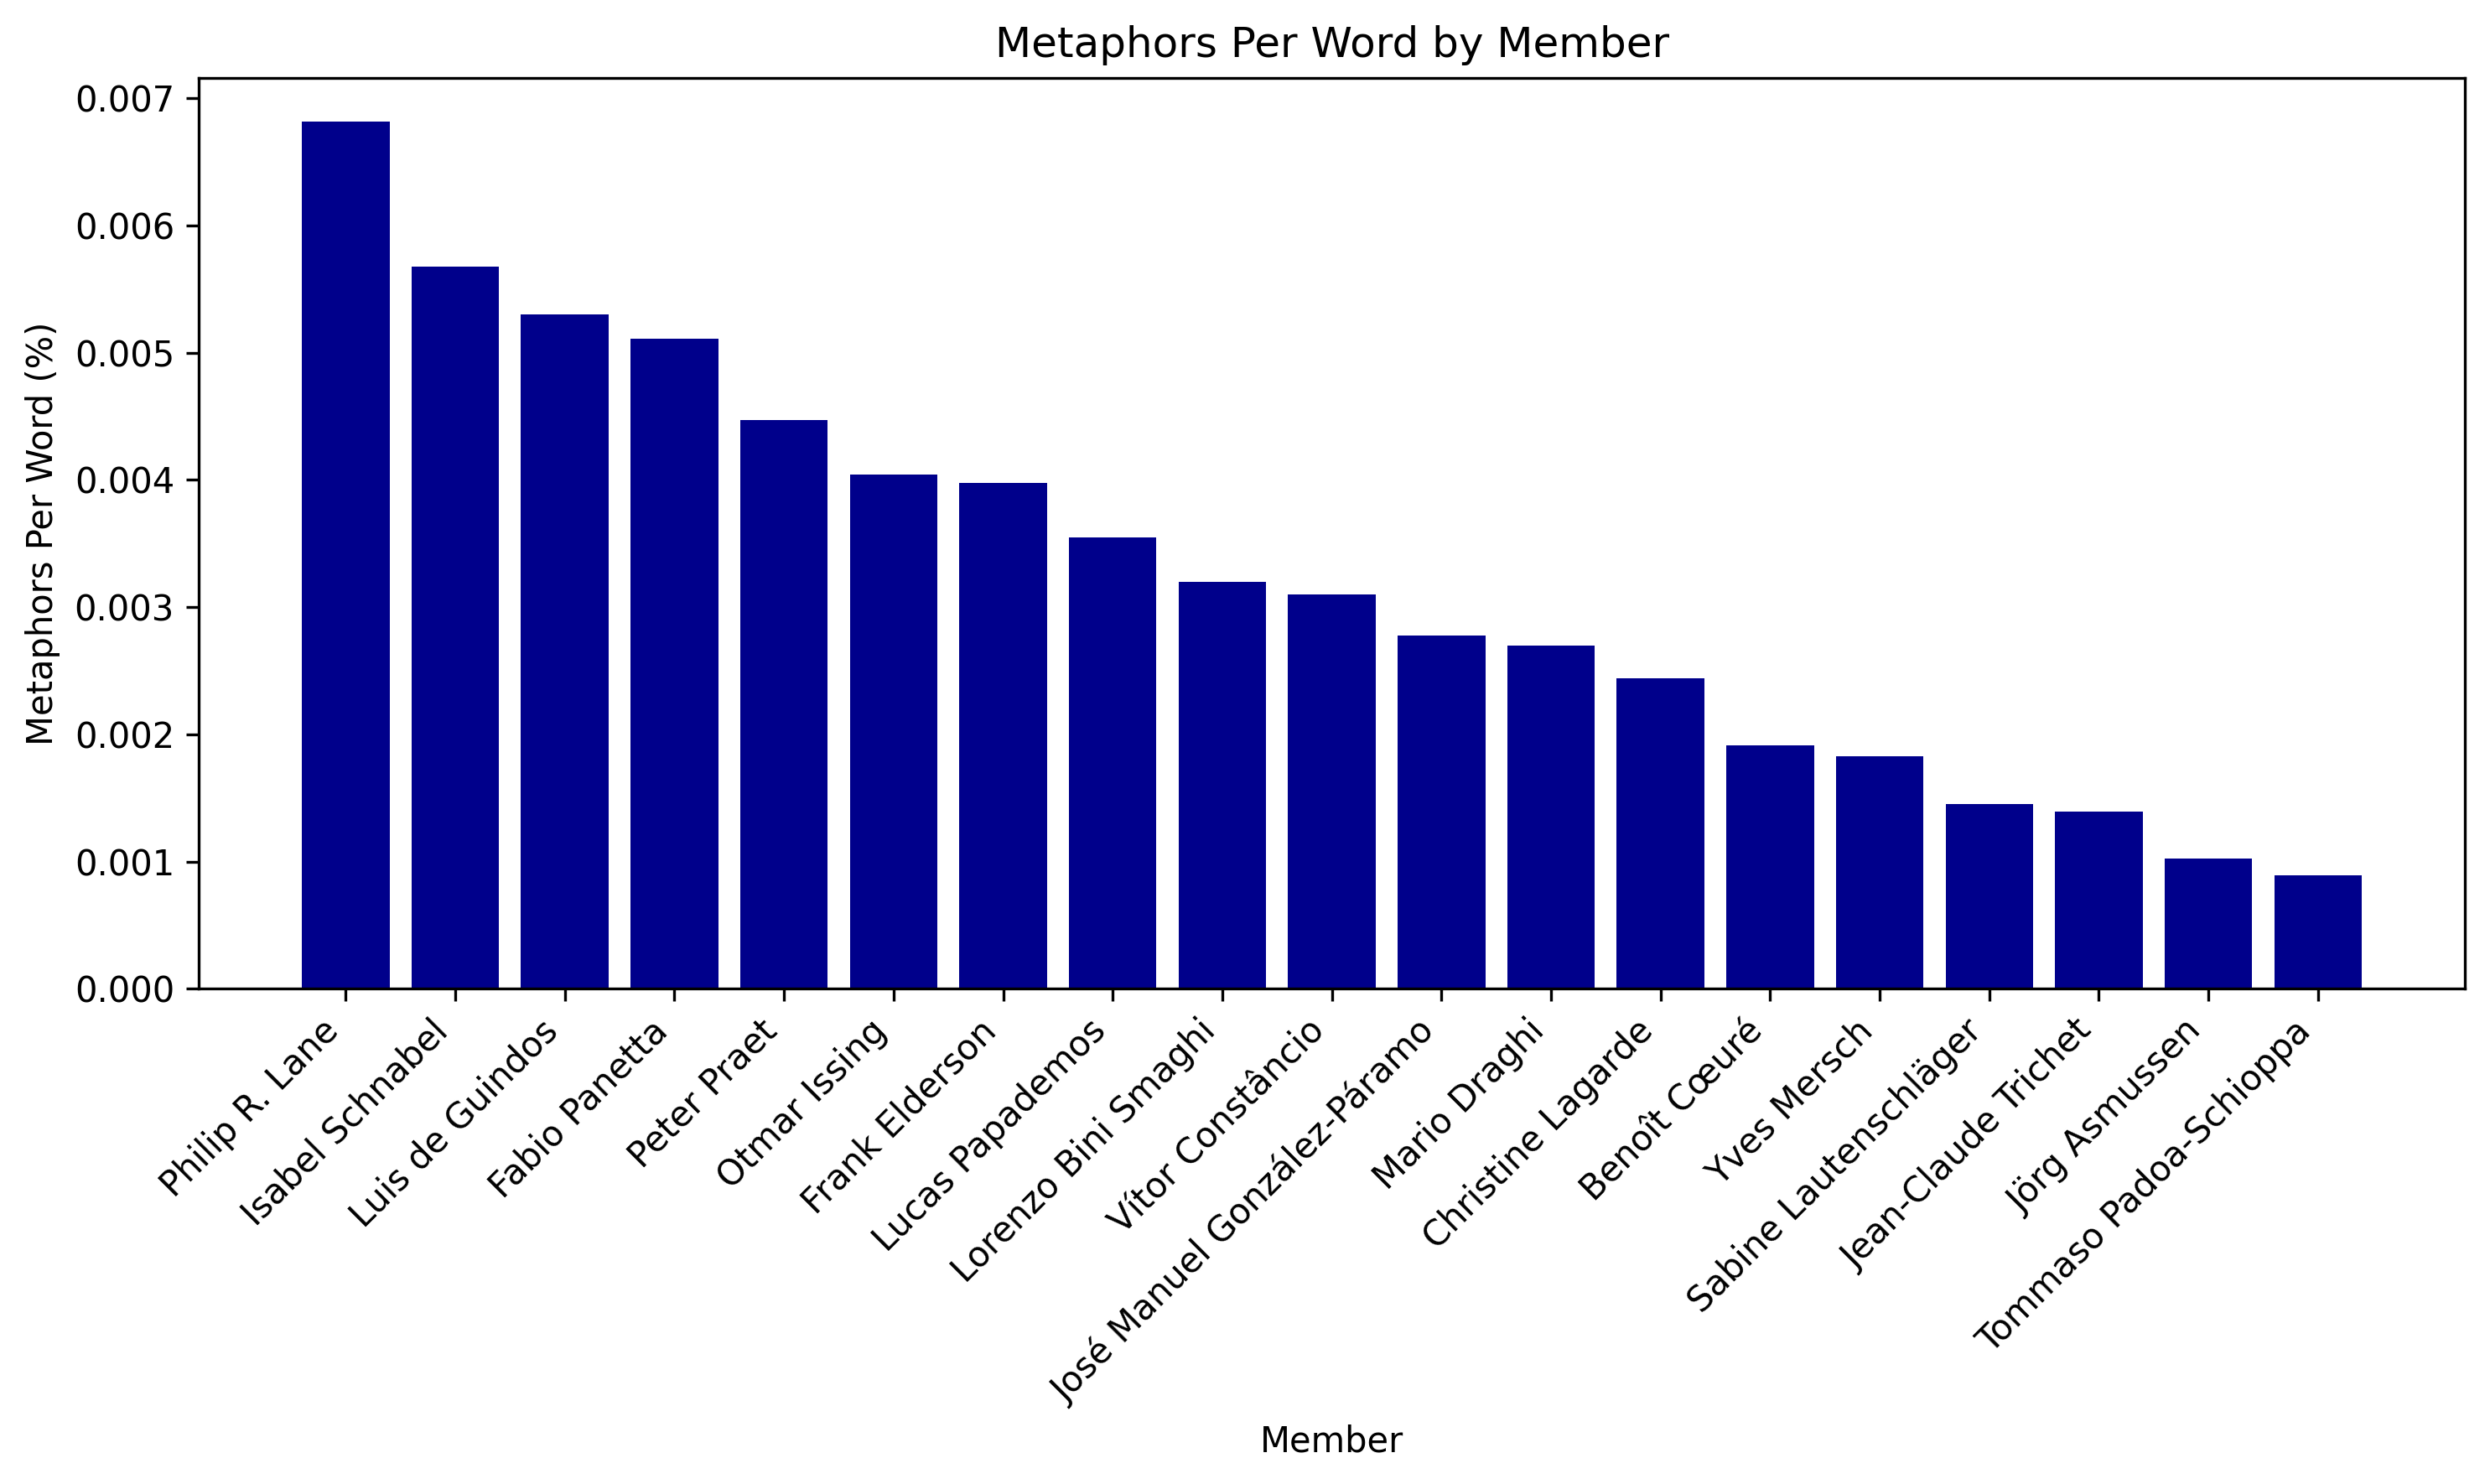

In [ ]:
# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(merged_df['Member'], merged_df['Member_Metaphors_Per_Word'], color='darkblue')
plt.xlabel('Member')
plt.ylabel('Metaphors Per Word (%)')
plt.title('Metaphors Per Word by Member')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

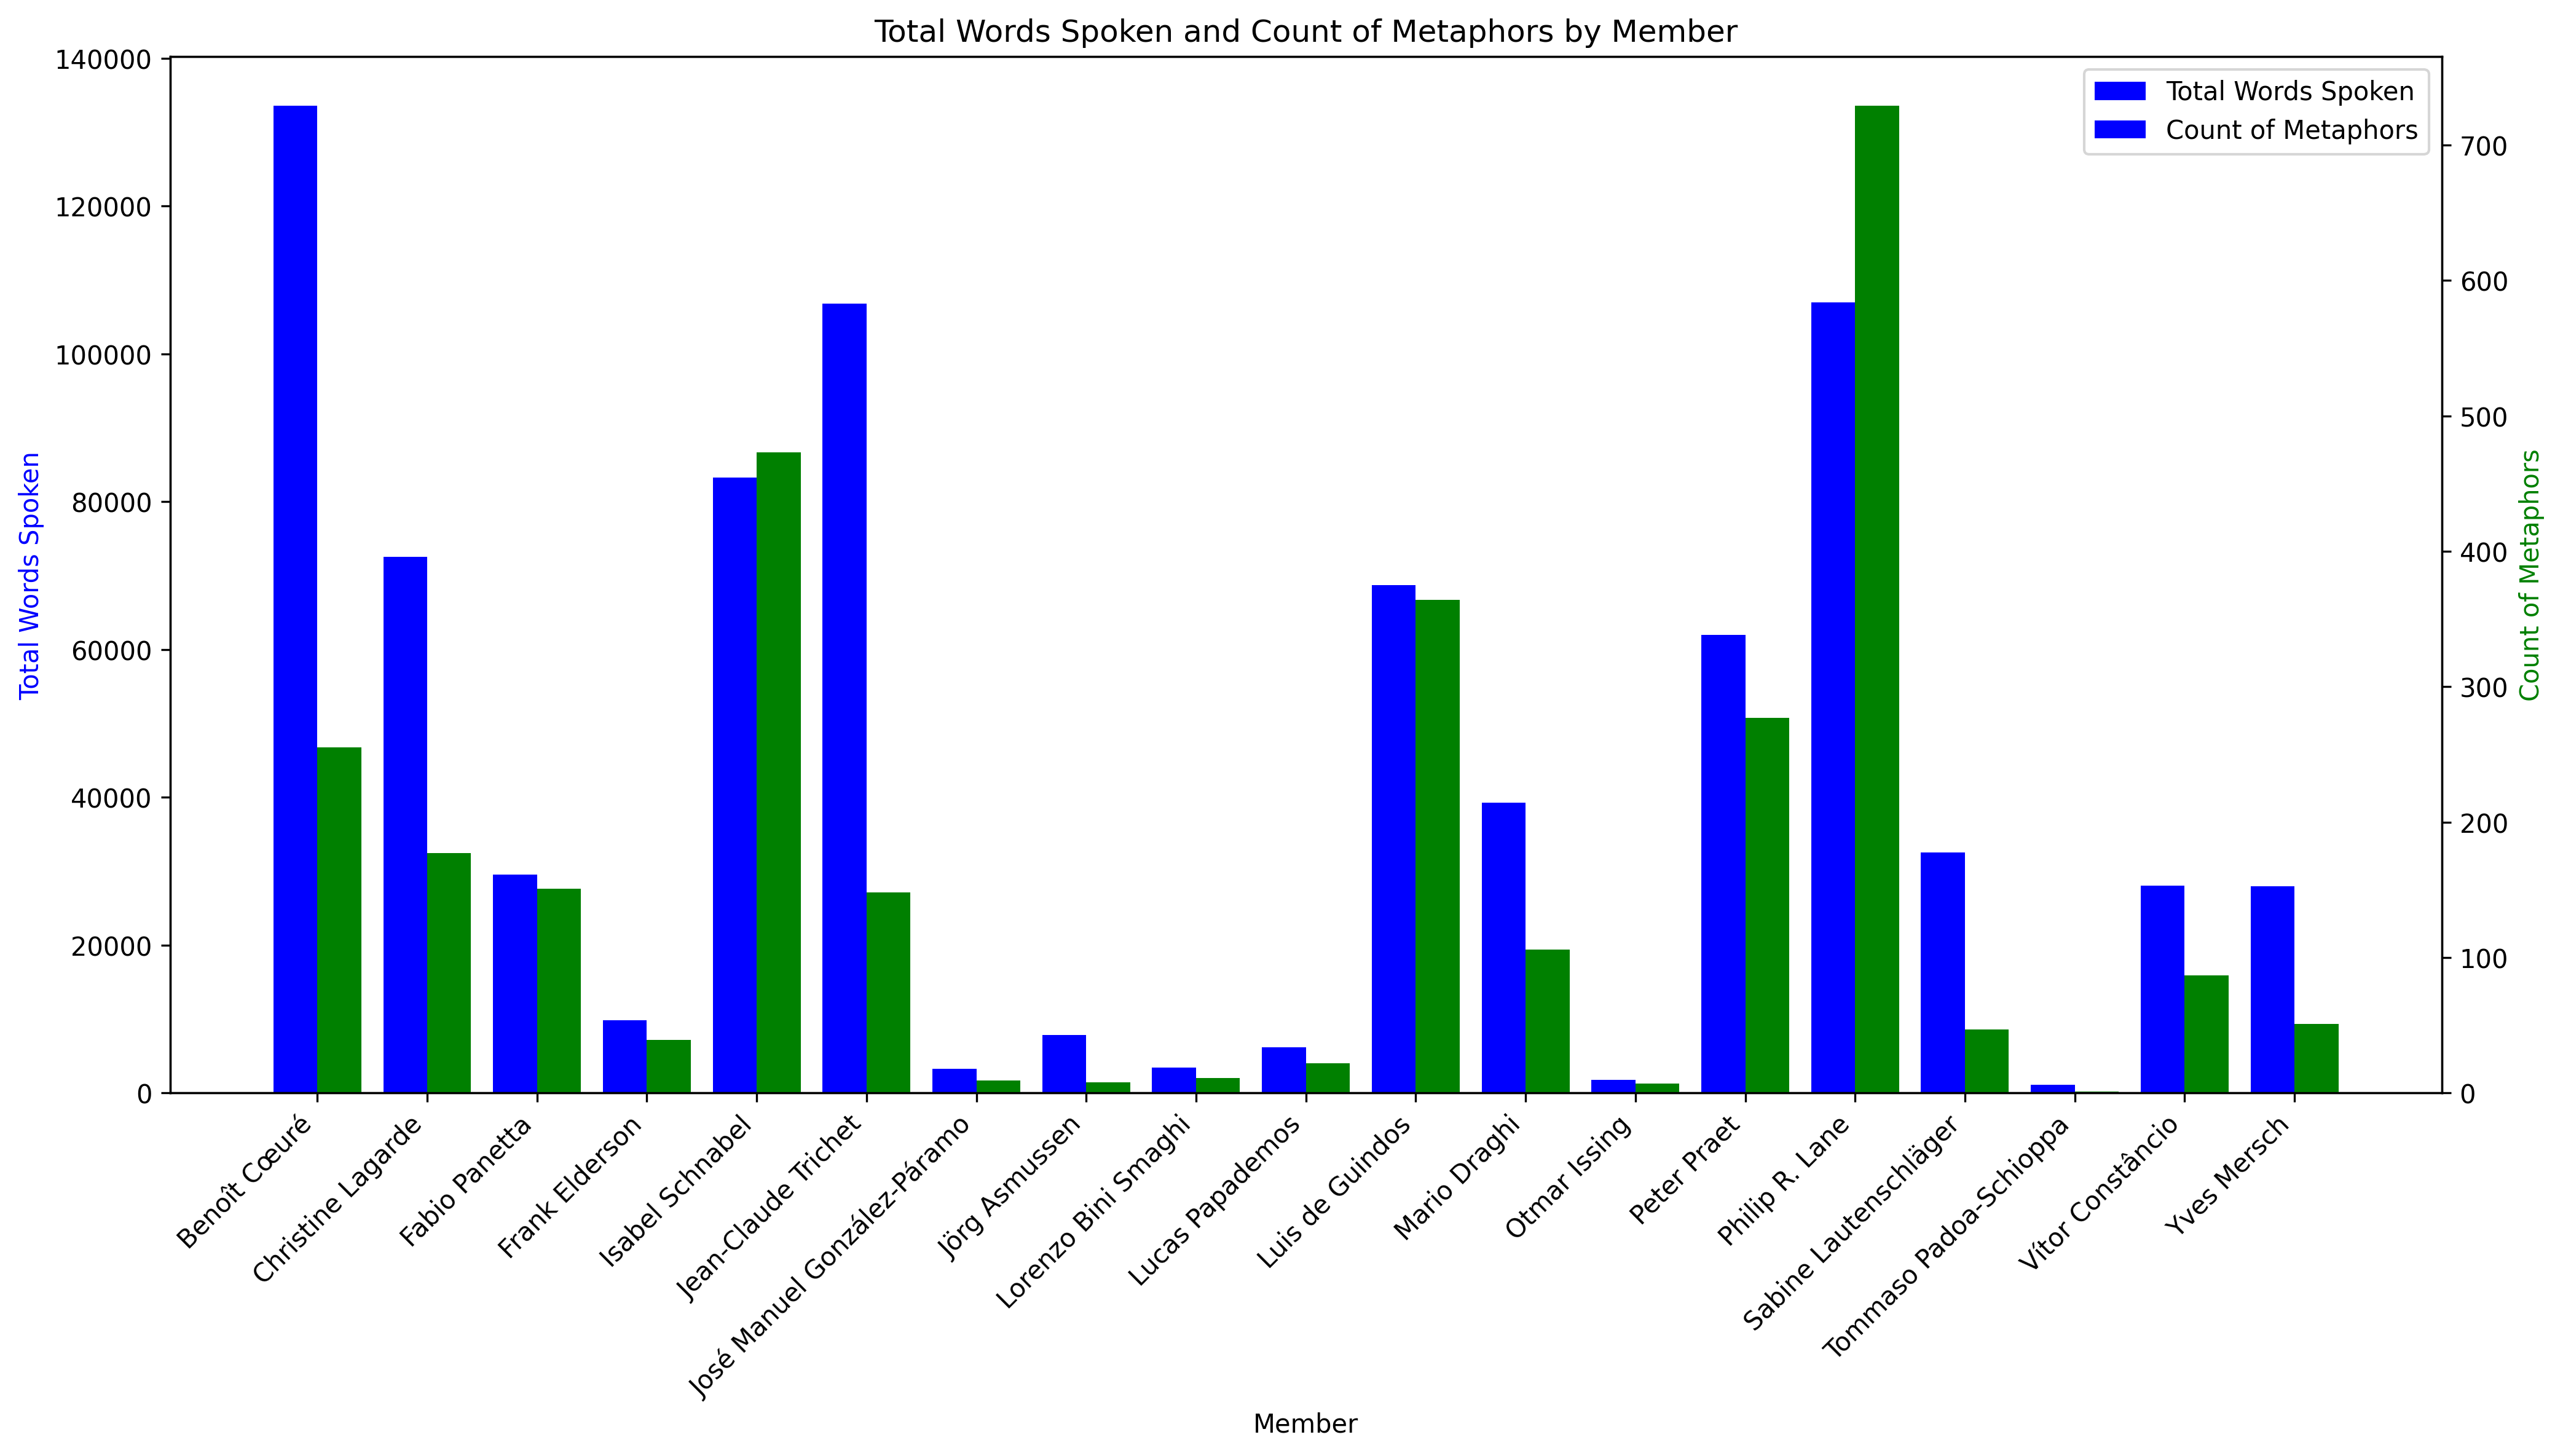

In [ ]:
# Group by member and sum the total number of words and metaphors
member_stats = data.groupby('Member').agg({
    'Speech_Total_Words': 'sum',
    'Count_Metaphors': 'sum'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=300)  # Increased figure size

# Bar plot for the total number of words spoken by each member
bar_width = 0.4
index = range(len(member_stats))
bar1 = ax1.bar(index, member_stats['Speech_Total_Words'], bar_width, label='Total Words Spoken', color='b')

# Create another y-axis for the count of metaphors
ax2 = ax1.twinx()
bar2 = ax2.bar([i + bar_width for i in index], member_stats['Count_Metaphors'], bar_width, label='Count of Metaphors', color='g')

# Labels and Titles
ax1.set_xlabel('Member')
ax1.set_ylabel('Total Words Spoken', color='b')
ax2.set_ylabel('Count of Metaphors', color='green')
plt.title('Total Words Spoken and Count of Metaphors by Member')

# Legends
bars = bar1 + bar2
labs = ['Total Words Spoken', 'Count of Metaphors']
ax1.legend(bars, labs, loc='upper right')

# Set x-ticks and labels
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(member_stats['Member'], rotation=45, ha='right')  # Adjust rotation and alignment

# Display the plot
plt.tight_layout()
plt.show()


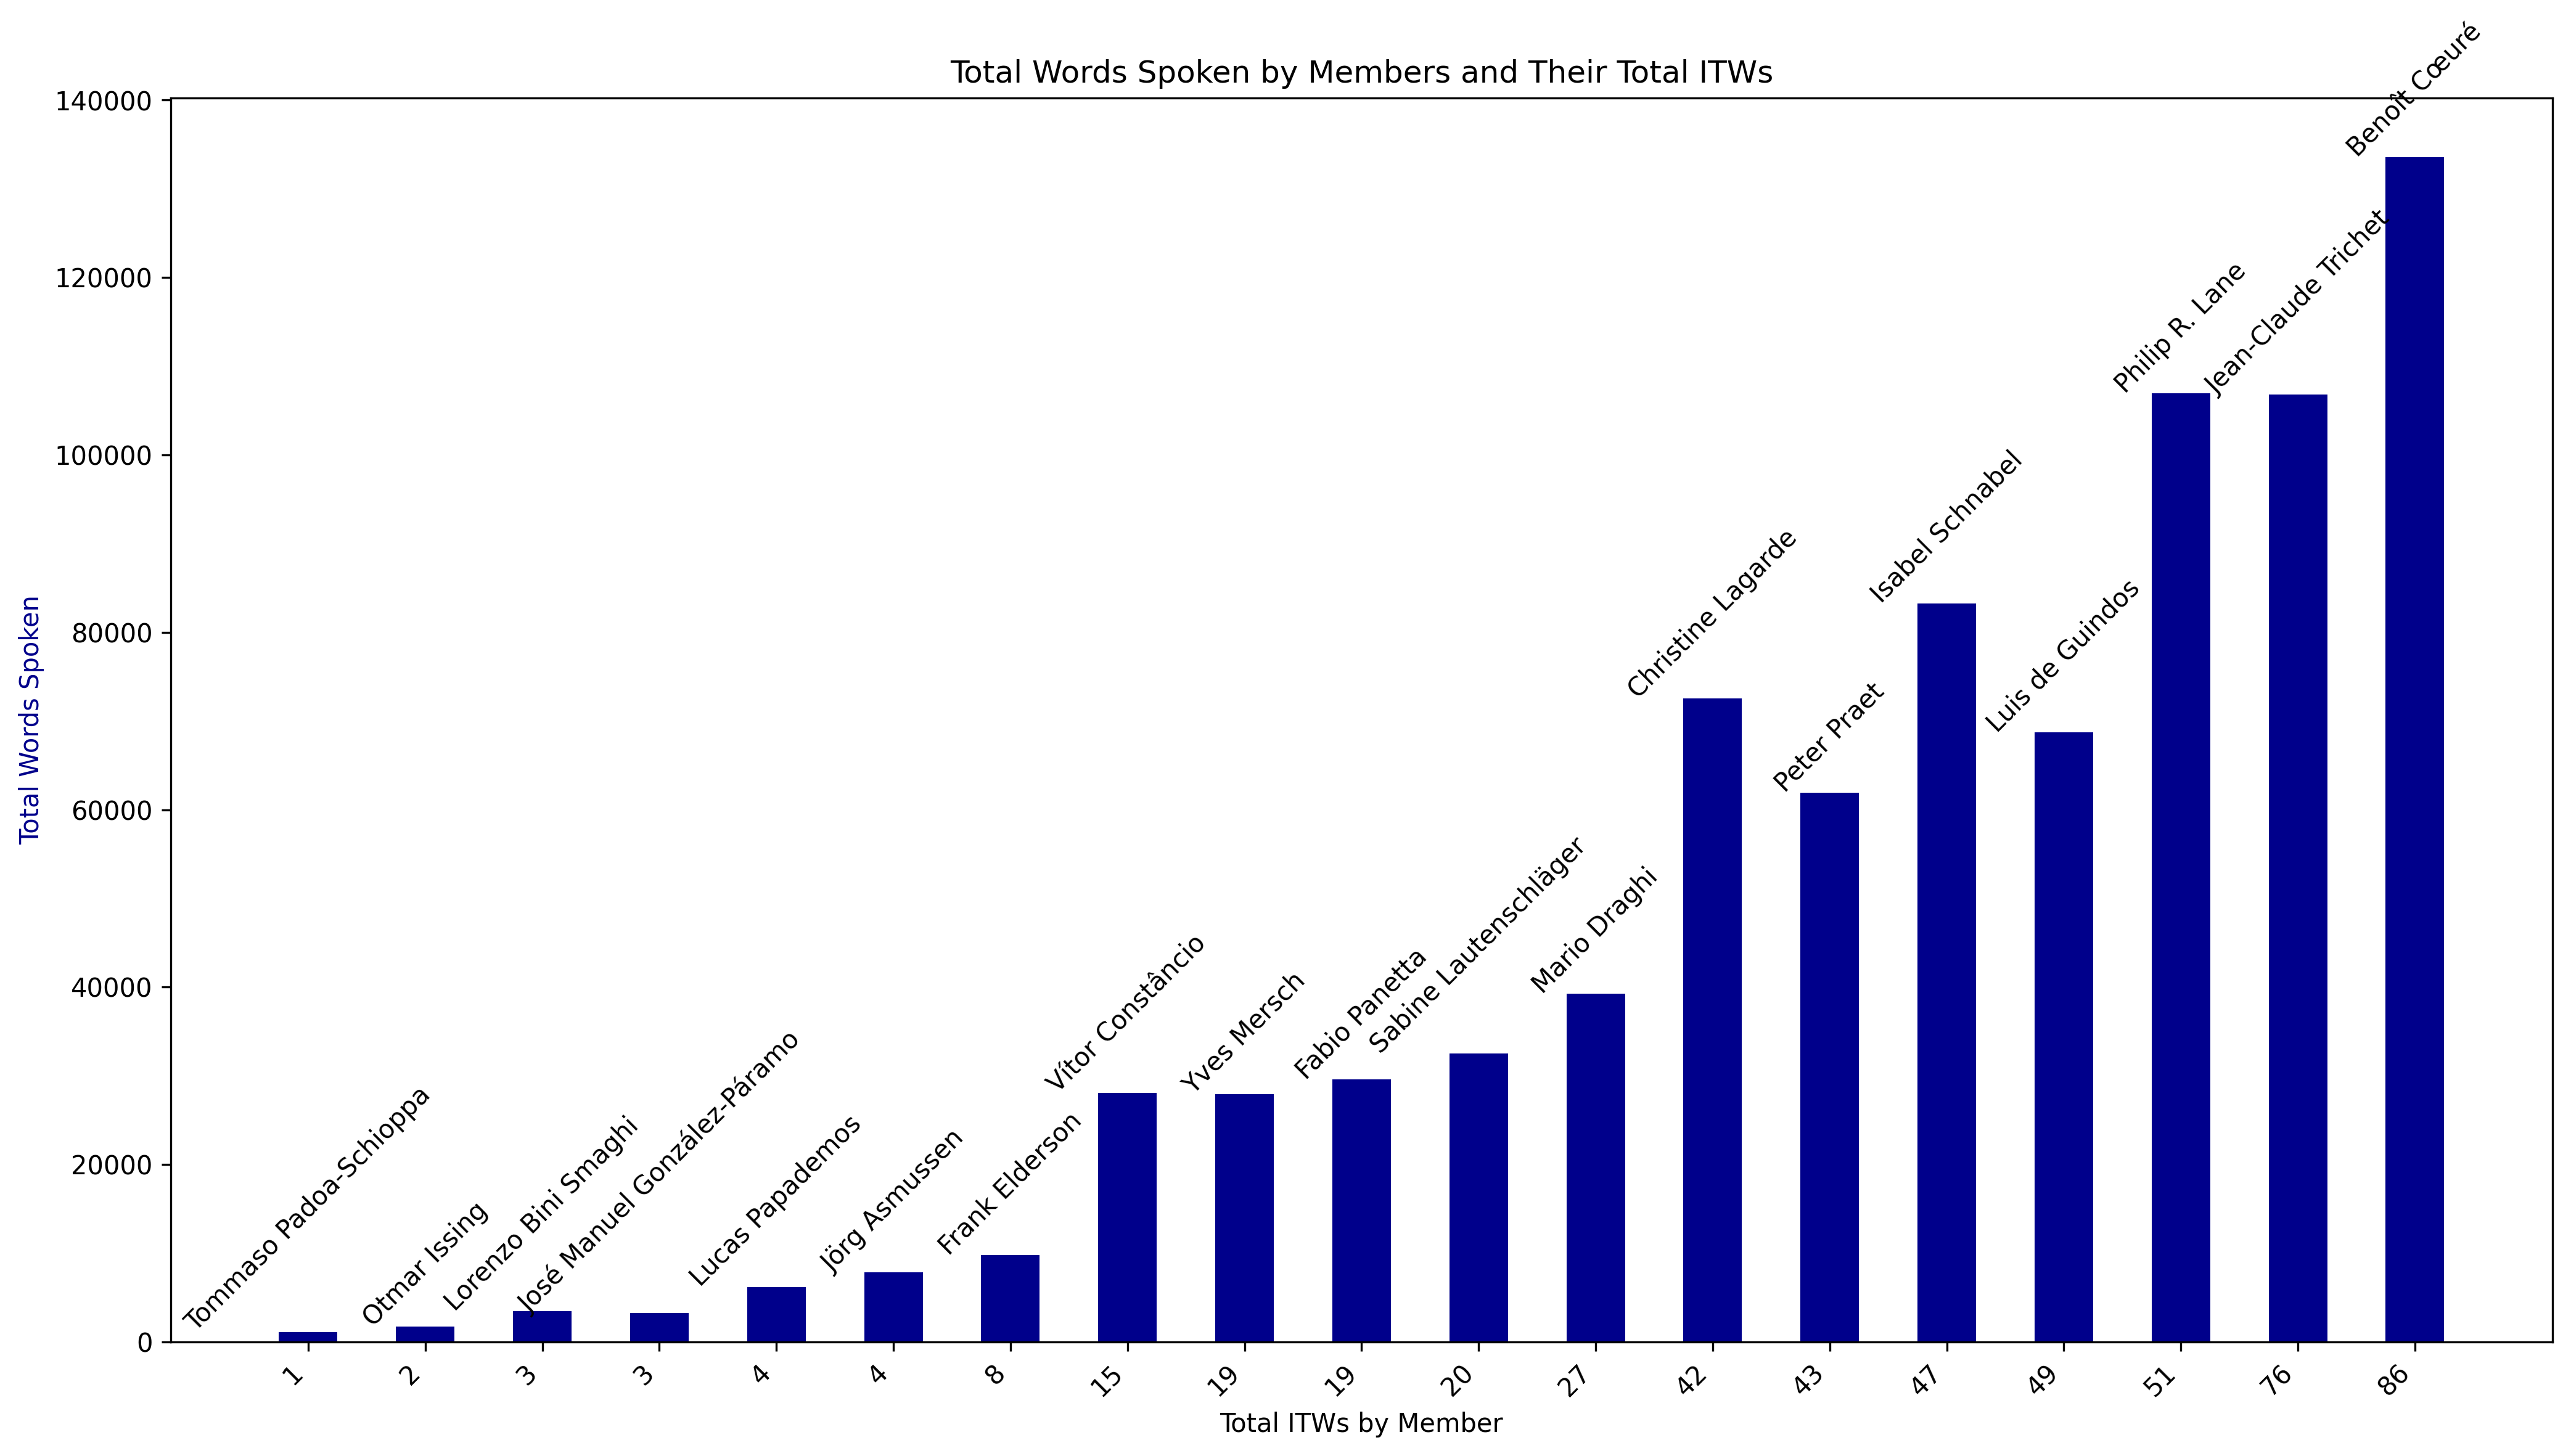

In [ ]:
# Group by member and sum the total number of words spoken
total_words_by_member = data.groupby('Member')['Speech_Total_Words'].sum().reset_index()
data['Total_ITW'] = data.groupby('Member')['Member'].transform('count')

# Merge the total number of words spoken with the Total_ITW column from the data DataFrame
member_stats = pd.merge(total_words_by_member, data[['Member', 'Total_ITW']].drop_duplicates(), on='Member')

# Sort members by the total number of ITWs
member_stats = member_stats.sort_values(by='Total_ITW').reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)  # Increased figure size

# Bar plot for the total number of words spoken by each member
bar_width = 0.5
index = range(len(member_stats))
bar = ax.bar(index, member_stats['Speech_Total_Words'], bar_width, label='Total Words Spoken', color='darkblue')

# Labels and Titles
ax.set_xlabel('Total ITWs by Member')
ax.set_ylabel('Total Words Spoken', color='darkblue')
plt.title('Total Words Spoken by Members and Their Total ITWs')

# Set x-ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(member_stats['Total_ITW'], rotation=45, ha='right')

# Adding member names above bars
for i in range(len(member_stats)):
    ax.text(x=index[i], y=member_stats['Speech_Total_Words'][i] + 100, s=member_stats['Member'][i], ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


### B. Gender

In [ ]:
# Group by gender and calculate the total number of metaphors and words
gender_stats = data.groupby('Gender').agg({
    'Count_Metaphors': 'sum',
    'Speech_Total_Words': 'sum'
}).reset_index()

# Calculate the ratio of metaphors per word for each gender
gender_stats['Member_Metaphors_Per_Word'] = ((gender_stats['Count_Metaphors'] / gender_stats['Speech_Total_Words']) * 100).round(2)
gender_stats

Gender  Count_Metaphors  Speech_Total_Words  Member_Metaphors_Per_Word
0      F              697              188311                       0.37
1      M             2265              636116                       0.36

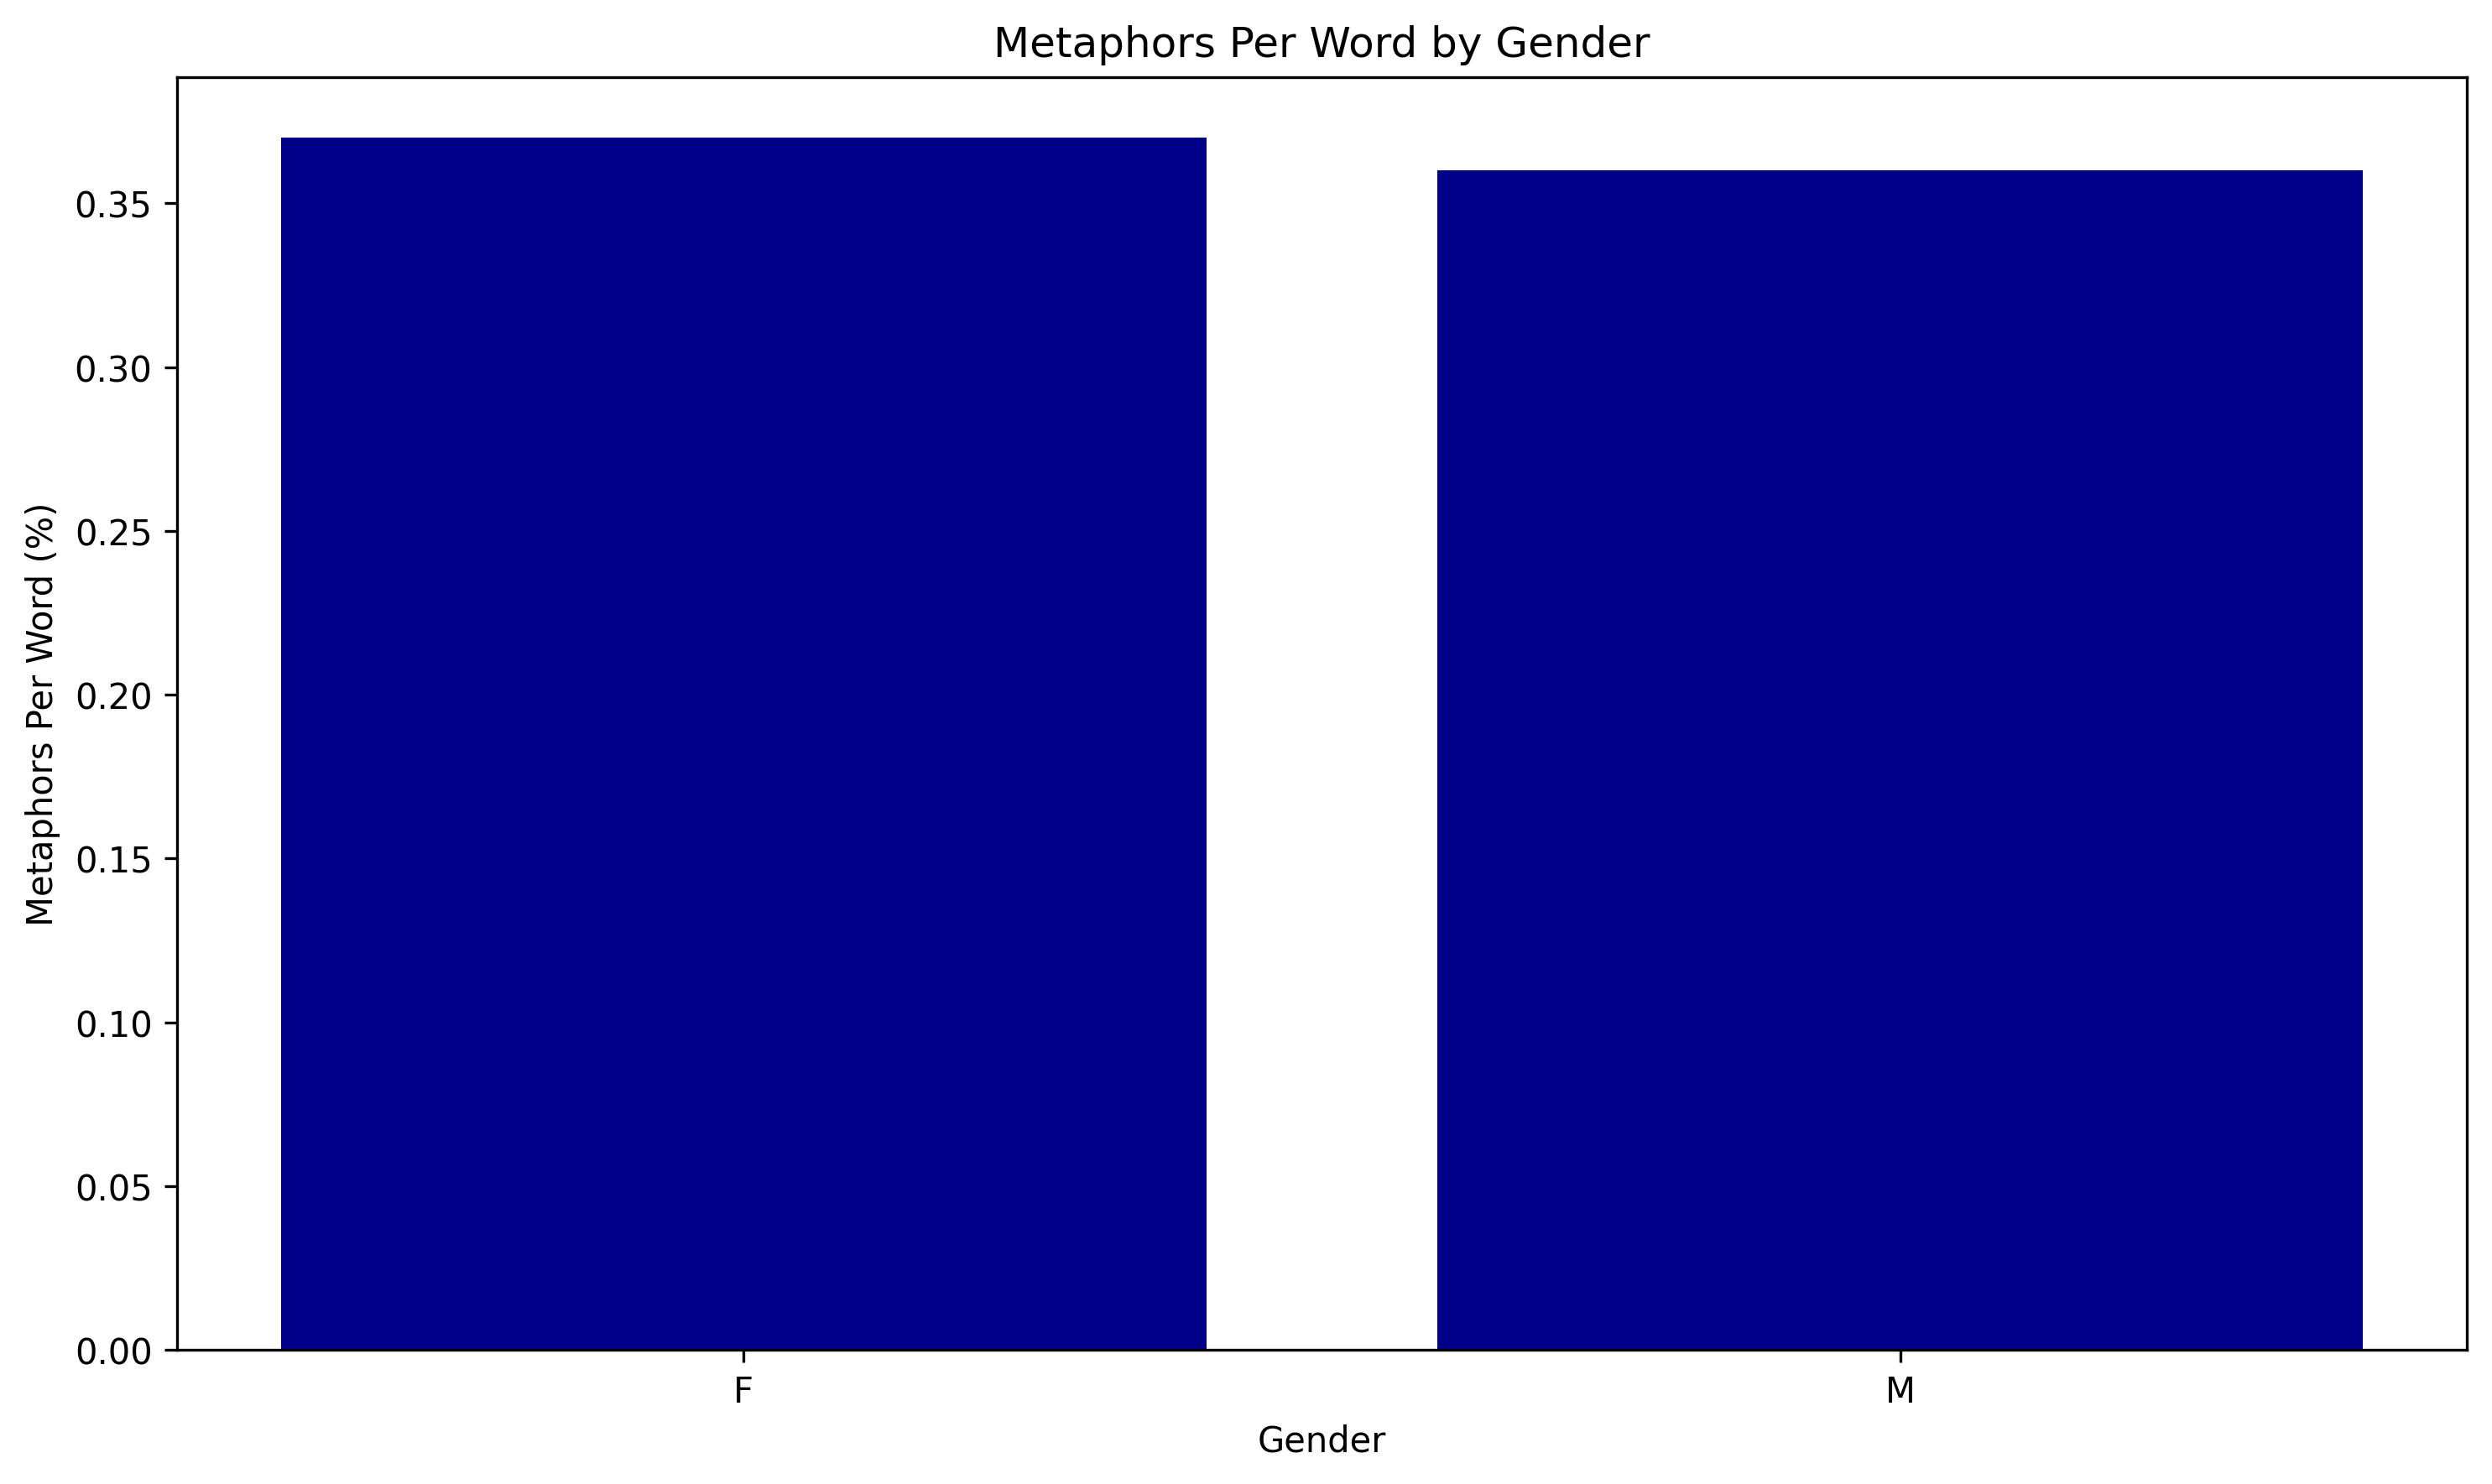

In [ ]:
# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(gender_stats['Gender'], gender_stats['Member_Metaphors_Per_Word'], color='darkblue')
plt.xlabel('Gender')
plt.ylabel('Metaphors Per Word (%)')
plt.title('Metaphors Per Word by Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### C. Year of Birth

In [ ]:
# Group by year of birth and calculate the total number of metaphors and words
year_stats = data.groupby('YoB').agg({
    'Count_Metaphors': 'sum',
    'Speech_Total_Words': 'sum'
}).reset_index()

# Calculate the ratio of metaphors per word for each year of birth
year_stats['Member_Metaphors_Per_Word'] = ((year_stats['Count_Metaphors'] / year_stats['Speech_Total_Words']) * 100).round(2)
year_stats

YoB  Count_Metaphors  Speech_Total_Words  Member_Metaphors_Per_Word
0   1936                7                1734                       0.40
1   1940                1                1120                       0.09
2   1942              148              106794                       0.14
3   1943               87               28057                       0.31
4   1947              128               45458                       0.28
5   1949              328               89883                       0.36
6   1956              188               75970                       0.25
7   1958                9                3233                       0.28
8   1959              151               29568                       0.51
9   1960              364               68723                       0.53
10  1964               47               32498                       0.14
11  1966                8                7823                       0.10
12  1969              984              240492                       0.41
13  1970               39                9797                       0.40
14  1971              473               83277                       0.57

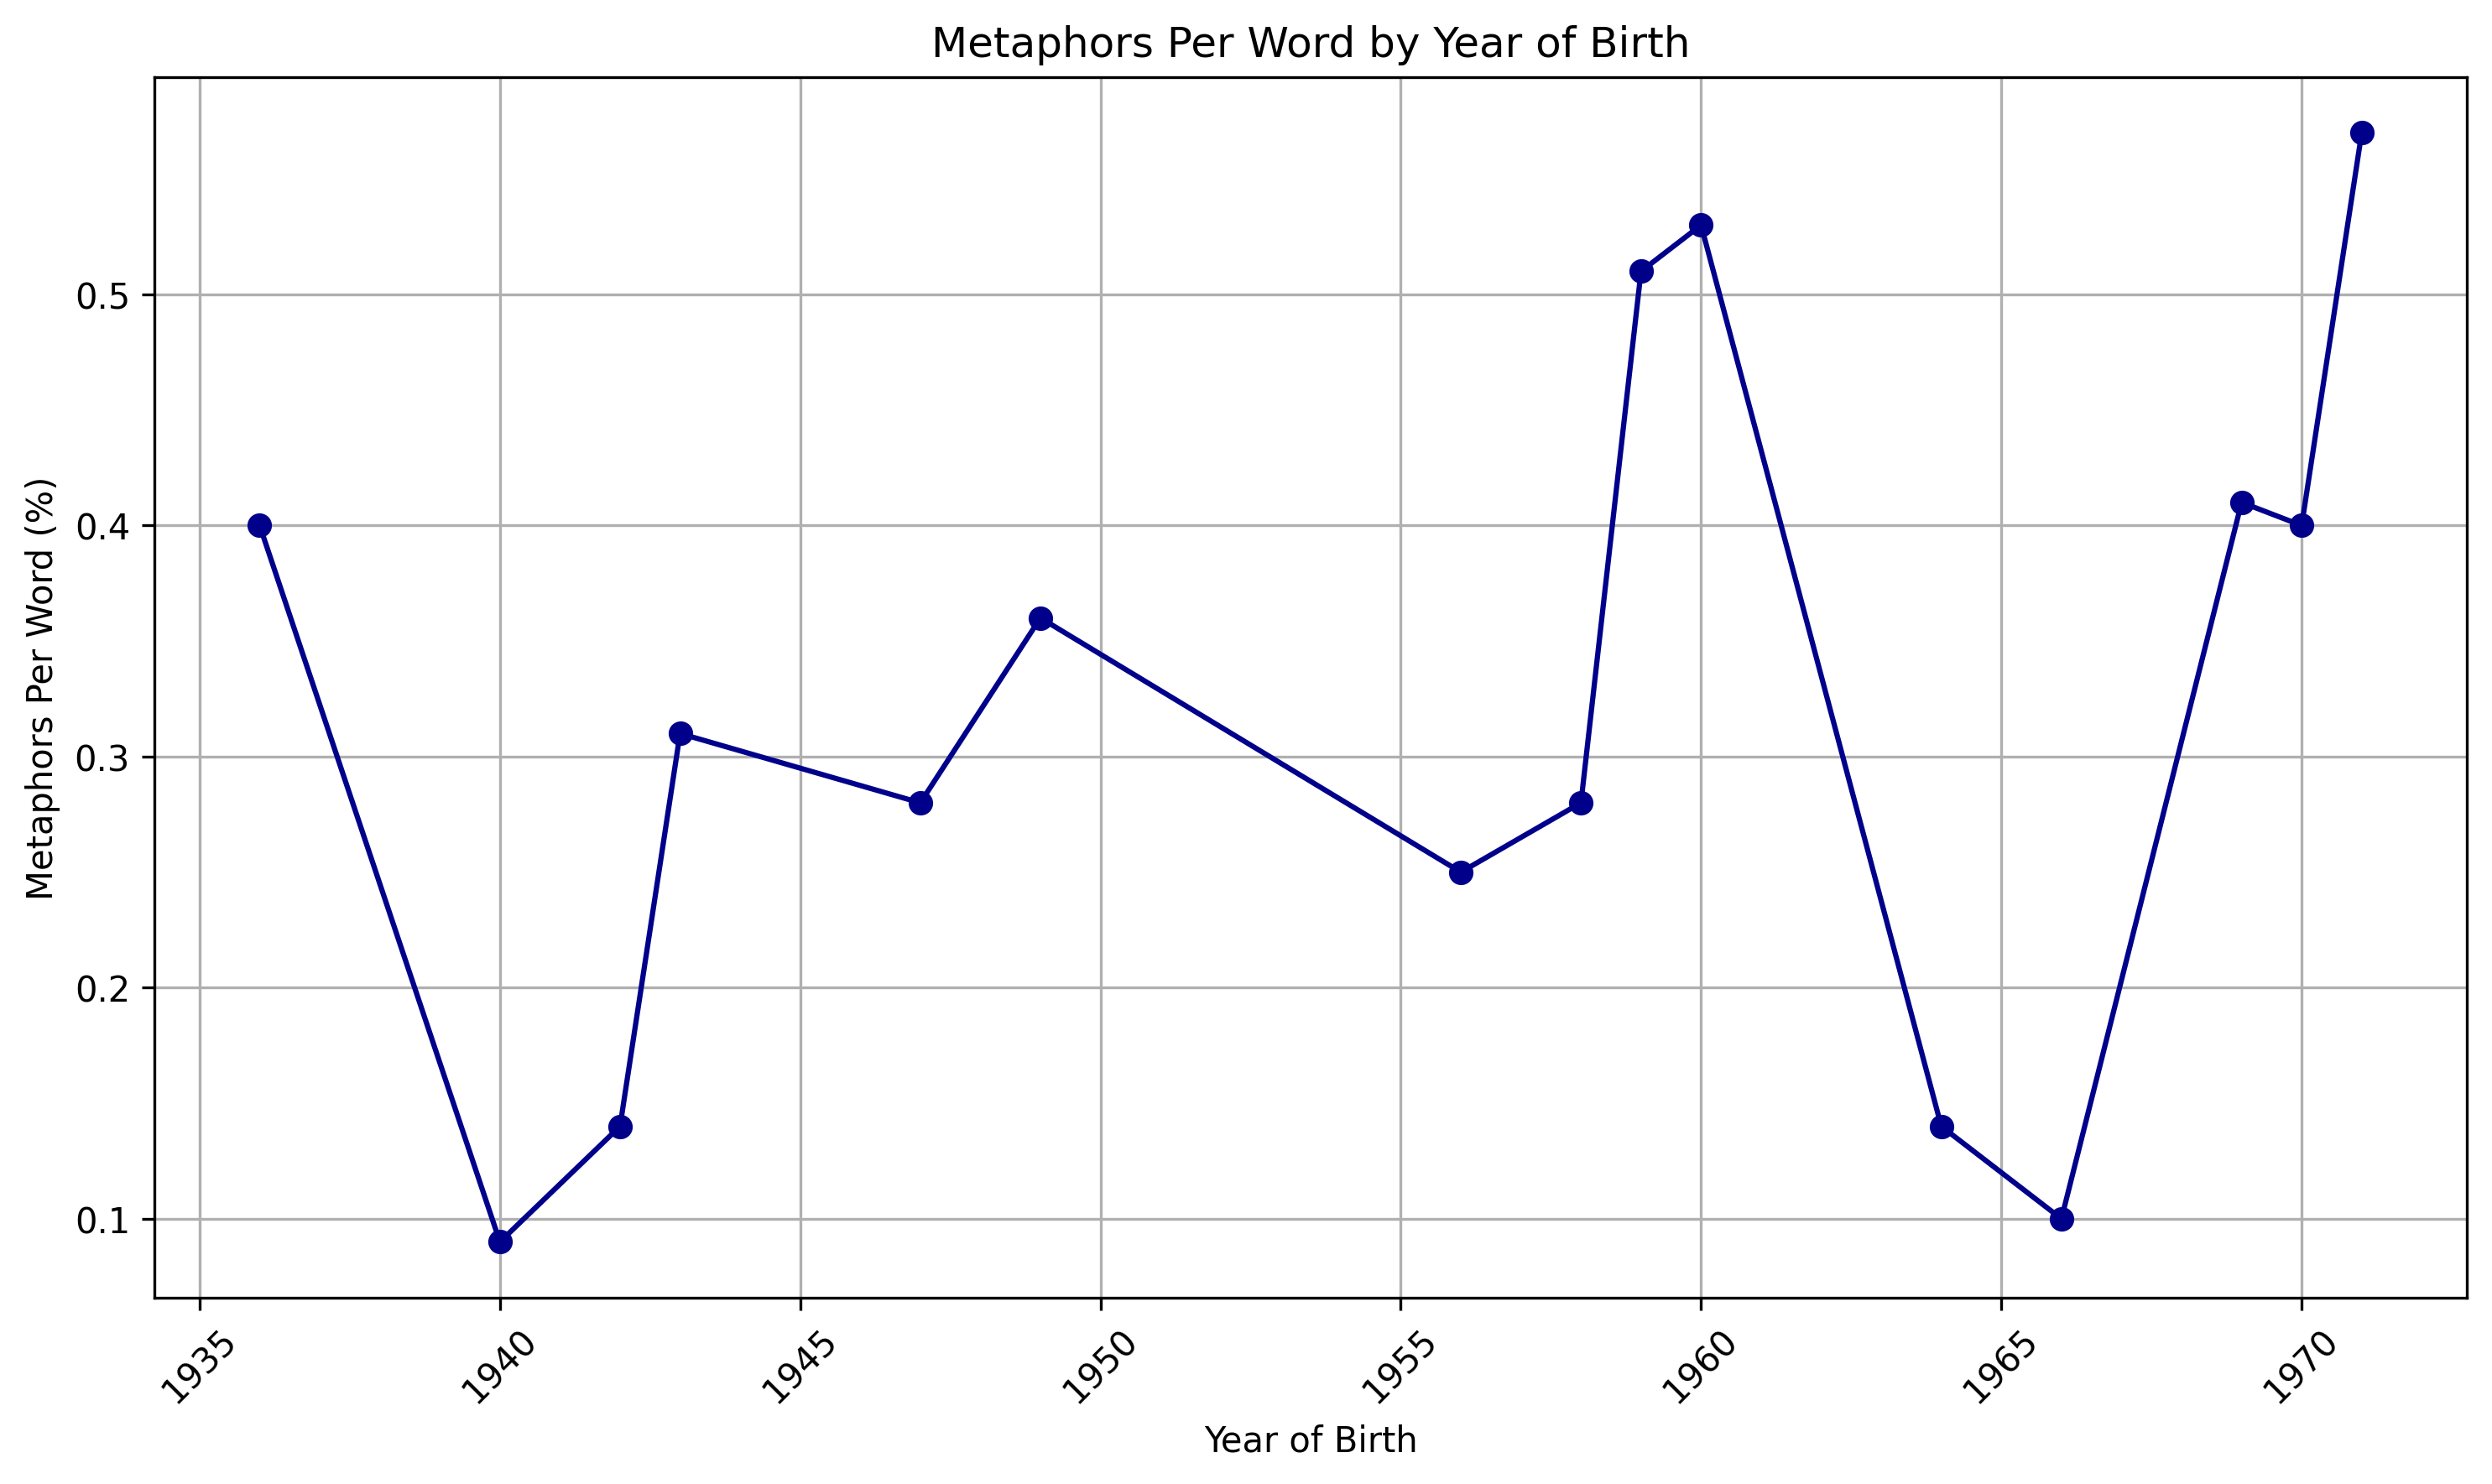

In [ ]:
# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(year_stats['YoB'], year_stats['Member_Metaphors_Per_Word'], marker='o', linestyle='-', color='darkblue')
plt.xlabel('Year of Birth')
plt.ylabel('Metaphors Per Word (%)')
plt.title('Metaphors Per Word by Year of Birth')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### D. By Media

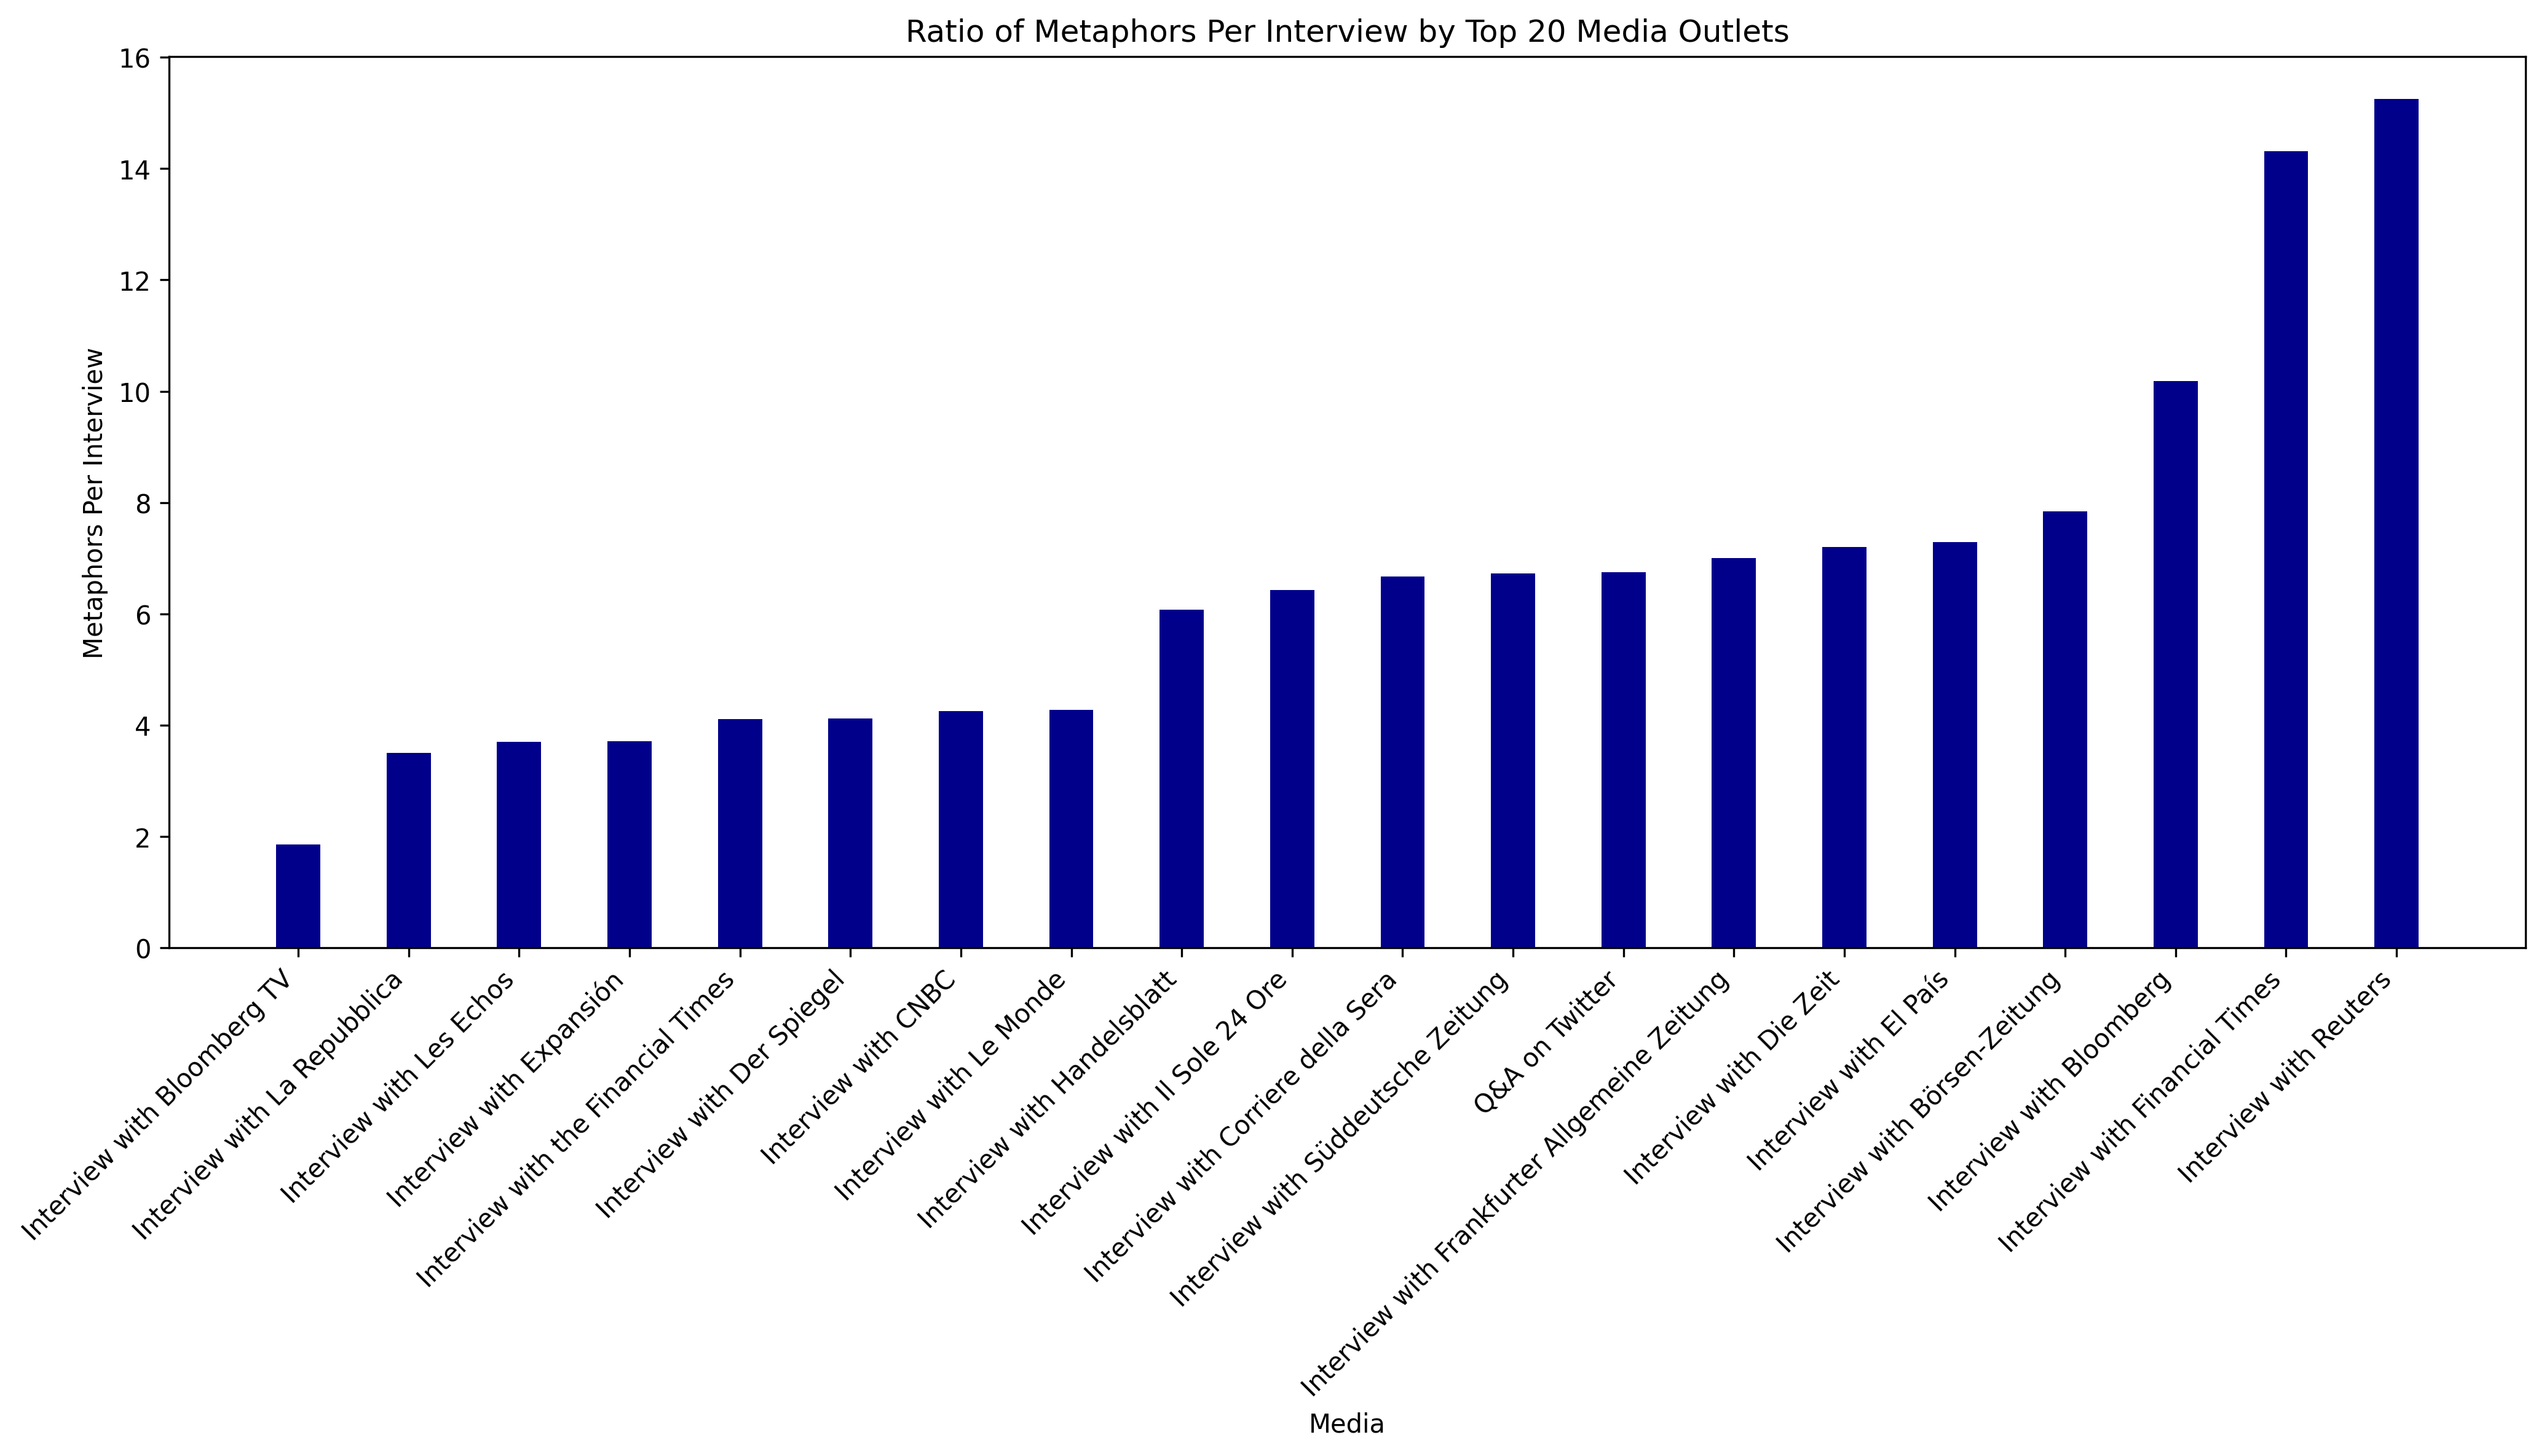

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Compute the total number of metaphors by media
total_metaphors_by_media = data.groupby('Media')['Count_Metaphors'].sum().reset_index()

# Step 2: Compute the total number of interviews by media
total_interviews_by_media = data['Media'].value_counts().reset_index()
total_interviews_by_media.columns = ['Media', 'Total_ITW']

# Step 3: Merge the total number of metaphors with the total number of interviews
media_stats = pd.merge(total_metaphors_by_media, total_interviews_by_media, on='Media')

# Step 4: Compute the ratio of metaphors per interview
media_stats['Metaphors_Per_ITW'] = media_stats['Count_Metaphors'] / media_stats['Total_ITW']

# Step 5: Sort the media by the total number of interviews in descending order and select the top 50
top_media_stats = media_stats.nlargest(20, 'Total_ITW')

# Step 6: Sort the top media by the ratio of metaphors per interview in ascending order
top_media_stats = top_media_stats.sort_values(by='Metaphors_Per_ITW')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)  # Increased figure size

# Bar plot for the ratio of metaphors per interview by each media
bar_width = 0.4
index = range(len(top_media_stats))
bar = ax.bar(index, top_media_stats['Metaphors_Per_ITW'], bar_width, color='darkblue')

# Labels and Titles
ax.set_xlabel('Media')
ax.set_ylabel('Metaphors Per Interview')
plt.title('Ratio of Metaphors Per Interview by Top 20 Media Outlets')

# Set x-ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(top_media_stats['Media'], rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
top_media_stats

Media  Count_Metaphors  \
31                     Interview with Bloomberg TV               13   
126                   Interview with La Repubblica               28   
142                       Interview with Les Echos               37   
75                        Interview with Expansión               26   
219             Interview with the Financial Times               37   
54                      Interview with Der Spiegel               33   
34                             Interview with CNBC               34   
136                        Interview with Le Monde               77   
96                     Interview with Handelsblatt               85   
104                  Interview with Il Sole 24 Ore               90   
43              Interview with Corriere della Sera               60   
185             Interview with Süddeutsche Zeitung               74   
235                                 Q&A on Twitter               81   
92   Interview with Frankfurter Allgemeine Zeitung               56   
61                         Interview with Die Zeit               72   
72                          Interview with El País               51   
33                   Interview with Börsen-Zeitung              102   
30                        Interview with Bloomberg              112   
80                  Interview with Financial Times              186   
177                         Interview with Reuters              122   

     Total_ITW  Metaphors_Per_ITW  
31           7           1.857143  
126          8           3.500000  
142         10           3.700000  
75           7           3.714286  
219          9           4.111111  
54           8           4.125000  
34           8           4.250000  
136         18           4.277778  
96          14           6.071429  
104         14           6.428571  
43           9           6.666667  
185         11           6.727273  
235         12           6.750000  
92           8           7.000000  
61          10           7.200000  
72           7           7.285714  
33          13           7.846154  
30          11          10.181818  
80          13          14.307692  
177          8          15.250000

Mapping Medias by area of specialization

In [ ]:
# Expanded dictionary mapping media outlets to their areas of interest
media_interest_mapping = {
    'Interview with Le Monde': 'General',
    'Interview with Les Echos': 'Economics and Finance',
    'Interview with Handelsblatt': 'Economics and Finance',
    'Interview with Il Sole 24 Ore': 'Economics and Finance',
    'Interview with Süddeutsche Zeitung': 'General',
    'Q&A on Twitter': 'General',
    'Interview with Die Zeit': 'General',
    'Interview with Börsen-Zeitung': 'Economics and Finance',
    'Interview with Bloomberg': 'Economics and Finance',
    'Interview with Financial Times': 'Economics and Finance',
    'Interview with Bloomberg TV': 'Economics and Finance',
    'Interview with La Repubblica': 'General',
    'Interview with Expansión': 'Economics and Finance',
    'Interview with Der Spiegel': 'General',
    'Interview with CNBC': 'Economics and Finance',
    'Interview with Frankfurter Allgemeine Zeitung': 'General',
    'Interview with El País': 'General',
    'Interview with Reuters': 'Economics and Finance',
    'Interview with Corriere della Sera': 'General',
    'Interview with Kathimerini': 'General',
    'Interview with Die Welt': 'General',
    'Interview with Het Financieele Dagblad': 'Economics and Finance',
    'Interview with La Stampa': 'General',
    'Interview with Le Figaro': 'General',
    'Interview with Deutschlandfunk': 'General',
    'Interview with Expresso': 'General',
    'Interview with Wall Street Journal': 'Economics and Finance',
    'Interview with Der Standard': 'General',
    'Interview with Politico': 'General',
    'Interview with La Vanguardia': 'General',
    'Interview with France 2': 'General',
    'Interview with Le Point': 'General',
    'Interview with Le Journal du Dimanche': 'General',
    'Interview with Europe 1': 'General',
    'Interview with Le Parisien': 'General',
    'Interview with Izvestia': 'General',
    'Interview with Libération': 'General',
    'Interview with La Provence': 'General',
    'Interview with France Inter': 'General',
    'Interview with FOCUS': 'General',
    'Interview with BFM Business TV': 'Economics and Finance',
    'Interview with De Tijd and L\'Echo': 'Economics and Finance',
    'Interview with De Tijd': 'Economics and Finance',
    'Interview with Hospodářské Noviny': 'Economics and Finance',
    'Interview with Financial Times and Financial Times Deutschland': 'Economics and Finance',
    'Interview with Paris Match': 'General',
    'Interview in Il Giornale': 'General',
    'Interview with Izvestia': 'General',
    'Interview with La Gaceta de los Negocios': 'Economics and Finance',
    'Interview with El Mercurio': 'General',
    'Interview with Ta Nea, Der Tagesspiegel and Luxemburger Wort': 'General',
    "Interview with L'Espresso": 'General',
    'Interview with Yediot Ahronot': 'General',
    'Interview with Ouest France': 'General',
    'Interview with Nikkei Business Magazine': 'Economics and Finance',
    'Interview with the Börsen-Zeitung': 'Economics and Finance',
    'Interview to Al-Ahram': 'General',
    'Interview with Folha de Sao Paulo': 'General',
    'Interview with Hospodárske noviny': 'Economics and Finance',
    'Interview with Le Figaro, Frankfurter Allgemeine Zeitung, Irish Times, Jornal de Negócios': 'General',
    'Interview with Die Presse, Der Kurier, Der Standard and Salzburger Nachrichten': 'General',
    "Interview with De Tijd and L'Echo": 'Economics and Finance',
    'Interview with the "Junge Zeitung“ of the Frankfurter Neue Presse': 'General',
    'Interview with Wall Street Journal': 'Economics and Finance',
    'Interview with China Finance': 'Economics and Finance',
    'Interview with Le Figaro Magazine': 'General',
    'Interview with Le Progrès': 'General',
    'Interview with Politis': 'General',
    'Interview with The Wall Street Journal': 'Economics and Finance',
    'Interview with Bild am Sonntag': 'General',
    "Interview with L'Express": 'General',
    'Interview with Financial Times Deutschland': 'Economics and Finance',
    'Interview with The Times': 'General',
    "Interview with L'Agefi Hebdo": 'General',
    'Interview with Bild Zeitung': 'General',
    'Interview with Le Journal du Dimanche': 'General',
    'Interview with To Vima': 'General',
    'Interview with Wirtschaftswoche': 'Economics and Finance',
    'Interview with Phileleftheros': 'General',
    'Interview with Cinco Días': 'General',
    'Interview with the Robert Schuman Foundation': 'General',
    'Interview with Deutschlandfunk': 'General',
    'Interview with Telegraaf': 'General',
    'Interview with Gazeta Wyborcza': 'General',
    'Interview with Thomson Reuters': 'General',
    'Interview with Neue Zürcher Zeitung': 'General',
    'Interview with Bloomberg': 'Economics and Finance',
    'Interview with International Bankers Forum': 'Economics and Finance',
    'Interview with La Libre Belgique': 'General',
    'Interview with the Leading European Newspaper Alliance - LENA': 'General',
    'Interview with El Financiero': 'Economics and Finance',
    'Interview with The Asian Banker': 'Economics and Finance',
    'Interview with CNBC Television': 'Economics and Finance',
    "Interview with L'Orient-Le Jour": 'General',
    'Interview with NEUE ZÜRCHER ZEITUNG': 'General',
    'Interview with EBRA newspaper group': 'General',
    'Interview with der Standard': 'General',
    'Interview with La Croix': 'General',
    "Interview with L'Economie politique": 'Economics and Finance',
    'Interview with La Vanguardia': 'General',
    'Interview with Jornal de Negócios': 'Economics and Finance',
    'Interview with the Irish Times': 'General',
    'Interview with the Telegraaf': 'General',
    'Interview with Bankfokus': 'Economics and Finance',
    'Interview with Efimerida ton Syntakton': 'General',
    'Interview with Le Progrès de Lyon and EBRA newspaper group': 'General',
    'Interview with ARD Tagesthemen': 'General',
    "Interview with L'Opinion": 'General',
    'Interview with Público': 'General',
    'Interview with Risk Magazine': 'Economics and Finance',
    'Interview with The Yomiuri Shimbun': 'General',
    'Interview with Bild': 'General',
}

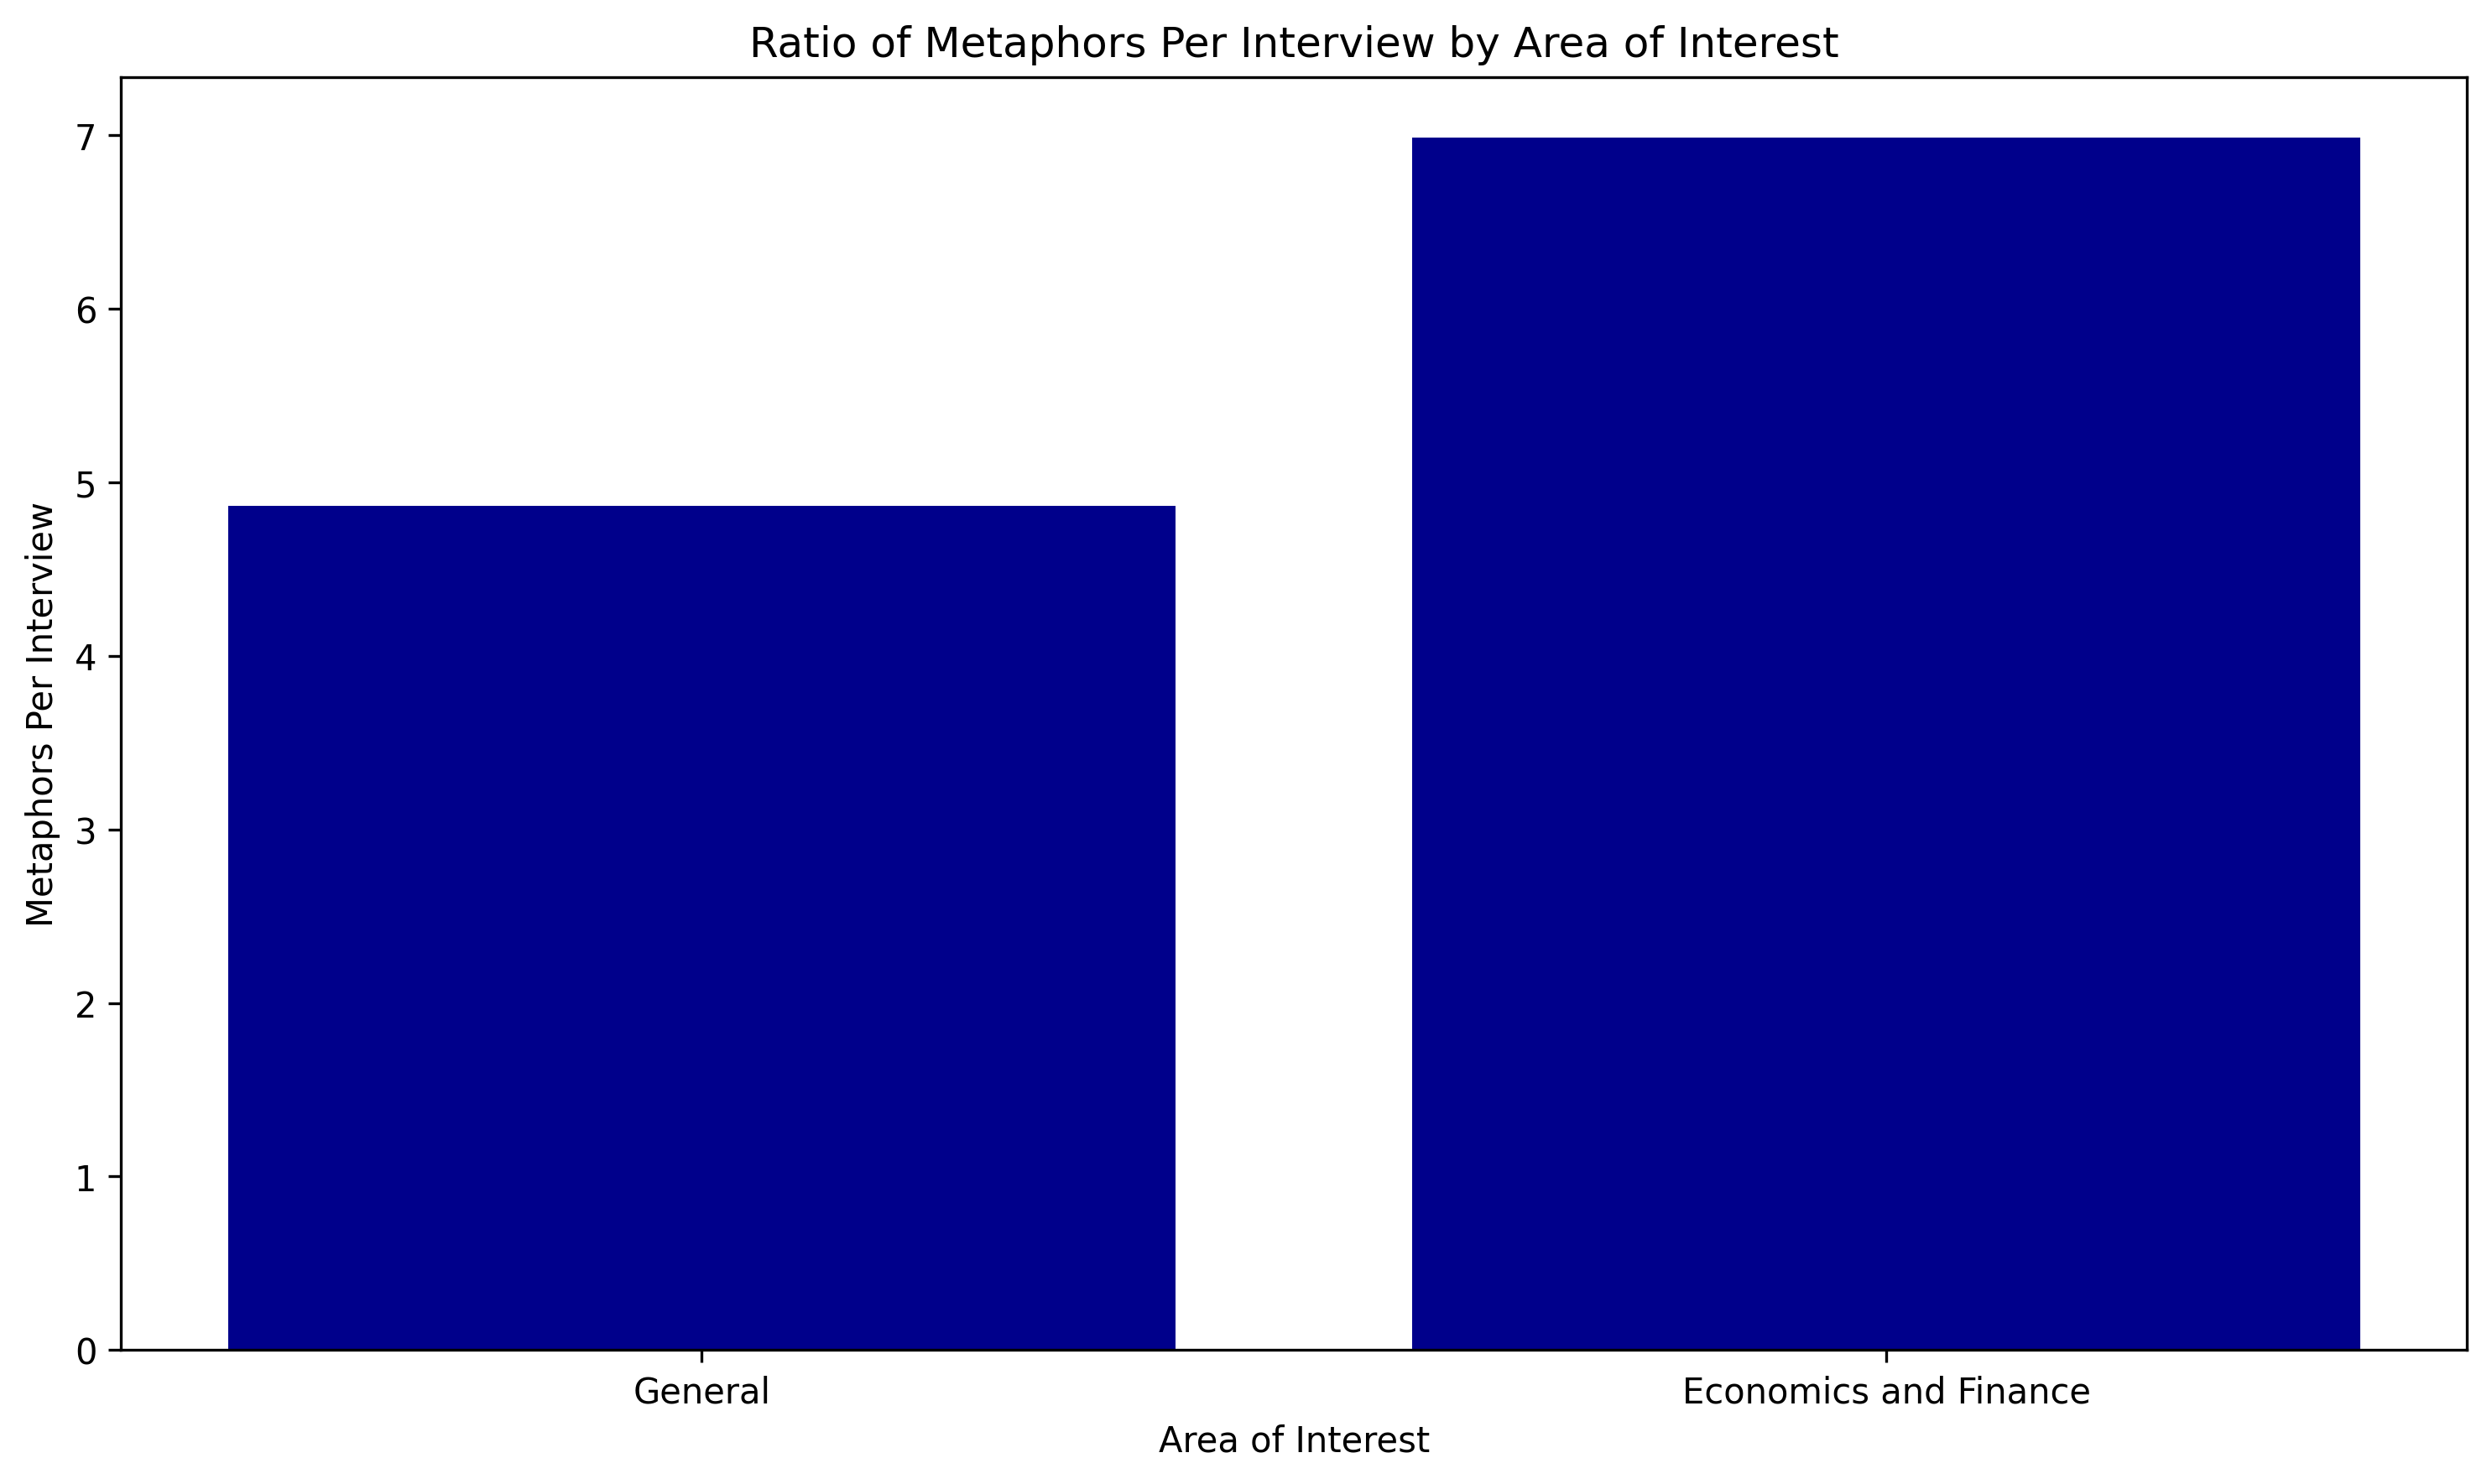

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Compute the total number of metaphors by media
total_metaphors_by_media = data.groupby('Media')['Count_Metaphors'].sum().reset_index()

# Step 2: Compute the total number of interviews by media
total_interviews_by_media = data['Media'].value_counts().reset_index()
total_interviews_by_media.columns = ['Media', 'Total_ITW']

# Step 3: Merge the total number of metaphors with the total number of interviews
media_stats = pd.merge(total_metaphors_by_media, total_interviews_by_media, on='Media')

# Step 4: Add a new column for area of interest
media_stats['Area_of_Interest'] = media_stats['Media'].apply(lambda media_name: next((value for key, value in media_interest_mapping.items() if key in media_name), 'Other'))

# Step 5: Filter out 'Other' category
media_stats_filtered = media_stats[media_stats['Area_of_Interest'] != 'Other']

# Step 6: Group by area of interest and compute total number of interviews and metaphors
area_stats = media_stats_filtered.groupby('Area_of_Interest').agg({
    'Total_ITW': 'sum',
    'Count_Metaphors': 'sum'
}).reset_index()

# Step 7: Compute the ratio of metaphors per interview
area_stats['Metaphors_Per_ITW'] = area_stats['Count_Metaphors'] / area_stats['Total_ITW']

# Step 8: Sort the areas by the ratio of metaphors per interview in ascending order
area_stats = area_stats.sort_values(by='Metaphors_Per_ITW')

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(area_stats['Area_of_Interest'], area_stats['Metaphors_Per_ITW'], color='darkblue')
plt.xlabel('Area of Interest')
plt.ylabel('Metaphors Per Interview')
plt.title('Ratio of Metaphors Per Interview by Area of Interest')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
area_stats

Area_of_Interest  Total_ITW  Count_Metaphors  Metaphors_Per_ITW
1                General        211             1026           4.862559
0  Economics and Finance        144             1006           6.986111

### 2. What type of metaphor category is the most common ? 
------

[Back to Index](#authors)

In [ ]:
data['GPT_Majority_Category'] = data['GPT_Majority_Category'].apply(ast.literal_eval)

Removing the categories with 0 metaphors 

In [ ]:
To_remove_lst = ["weather", "physical","pressure","none","other"]

# Use a loop to remove each word from the lists
for word in To_remove_lst:
    data['GPT_Majority_Category'] = data['GPT_Majority_Category'].apply(lambda x: [item for item in x if item != word])
    
data['GPT_Majority_Category']

0                              [machine, disease, plant]
1                                              [warfare]
2                               [fire, fire, fire, fire]
3            [warfare, disease, disease, machine, plant]
4      [orientation, orientation, orientation, orient...
                             ...                        
514    [warfare, disease, disease, orientation, orien...
515                                                   []
516    [fire, fire, fire, disease, disease, warfare, ...
517    [orientation, orientation, orientation, orient...
518                                                   []
Name: GPT_Majority_Category, Length: 519, dtype: object

In [ ]:
# Flatten the list of categories
all_categories = [category for sublist in data['GPT_Majority_Category'] for category in sublist]

# Count the total number of each category
category_counts = Counter(all_categories)

# Convert to DataFrame for easier analysis
category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])
category_df['Percentage'] = (category_df['Count'] / category_df['Count'].sum()) * 100

print("Category Counts and Percentages:")
category_df

# Convert DataFrame to LaTeX table
latex_table = category_df.to_latex(index=False)

print("\nLaTeX Table:")
print(latex_table)

Category Counts and Percentages:

LaTeX Table:
\begin{tabular}{lrr}
\toprule
Category & Count & Percentage \\
\midrule
machine & 238 & 10.610789 \\
disease & 279 & 12.438698 \\
plant & 66 & 2.942488 \\
warfare & 212 & 9.451627 \\
fire & 40 & 1.783326 \\
orientation & 1326 & 59.117254 \\
liquids & 39 & 1.738743 \\
animal & 18 & 0.802497 \\
sports & 25 & 1.114579 \\
\bottomrule
\end{tabular}



In [ ]:
data

Unnamed: 0        Date  \
0             0  2005-12-23   
1             1  2005-12-19   
2             2  2005-12-19   
3             3  2005-12-15   
4             4  2005-12-09   
..          ...         ...   
514         514  2024-01-31   
515         515  2024-01-22   
516         516  2024-01-13   
517         517  2024-01-10   
518         518  2024-01-03   

                                                 Media               Member  \
0                           Interview with Der Spiegel  Jean-Claude Trichet   
1                    Interview with Hospodářské Noviny         Otmar Issing   
2    Interview with Financial Times and Financial T...      Lucas Papademos   
3                           Interview with Paris Match  Jean-Claude Trichet   
4                             Interview in Il Giornale  Lorenzo Bini Smaghi   
..                                                 ...                  ...   
514                            Interview with Die Zeit      Luis de Guindos   
515                        Thanks to Wolfgang Schäuble    Christine Lagarde   
516                 Interview with Corriere della Sera       Philip R. Lane   
517                                           Q&A on X      Isabel Schnabel   
518  Tribute article on Wolfgang Schäuble for Die Zeit    Christine Lagarde   

                                                  Link  \
0    https://www.ecb.europa.eu/press/inter/date/200...   
1    https://www.ecb.europa.eu/press/inter/date/200...   
2    https://www.ecb.europa.eu/press/inter/date/200...   
3    https://www.ecb.europa.eu/press/inter/date/200...   
4    https://www.ecb.europa.eu/press/inter/date/200...   
..                                                 ...   
514  https://www.ecb.europa.eu/press/inter/date/202...   
515  https://www.ecb.europa.eu/press/inter/date/202...   
516  https://www.ecb.europa.eu/press/inter/date/202...   
517  https://www.ecb.europa.eu/press/inter/date/202...   
518  https://www.ecb.europa.eu/press/inter/date/202...   

                                           Information  \
0                                Information not found   
1                                Information not found   
2                                Information not found   
3                                Information not found   
4                                Information not found   
..                                                 ...   
514  Interview with Luis de Guindos, Vice-President...   
515  Contribution by Christine Lagarde, President o...   
516  Interview with Philip R. Lane, Member of the E...   
517  Interview with Isabel Schnabel, Member of the ...   
518  Tribute article on Wolfgang Schäuble for Die Z...   

                                             Questions  \
0    SPIEGEL: Monsieur Trichet, any concrete uttera...   
1    The new EU member states want to adopt the eur...   
2    Mr Papademos, you have responsibility as ECB V...   
3    Paris Match. After two uneventful years at the...   
4    However, Europe’s politicians, with few except...   
..                                                 ...   
514  Mr de Guindos, Germany is in a recession, the ...   
515                                         Disclaimer   
516  The rate hike in September was meant to increa...   
517  Who decided that 2% inflation is good and what...   
518                                                NaN   

                                               Answers  \
0    The publication of the translation was authori...   
1    These questions are all closely related to eac...   
2    A comparison of the risks involved when short-...   
3    The publication of the translation was authori...   
4    By Angelo Allegri, our correspondent in Frankf...   
..                                                 ...   
514  31 January 2024[end_answer] There are three re...   
515  Frankfurt am Main, 22 January 2024[end_answer]...   
516  13 January 2024[end_answer] The first point to...   
517  10 Janu

Removing the categories we consider less informative

In [ ]:
To_remove_lst = ["orientation"]

# Use a loop to remove each word from the lists
for word in To_remove_lst:
    data['GPT_Majority_Category'] = data['GPT_Majority_Category'].apply(lambda x: [item for item in x if item != word])
    
data['GPT_Majority_Category']

0                              [machine, disease, plant]
1                                              [warfare]
2                               [fire, fire, fire, fire]
3            [warfare, disease, disease, machine, plant]
4                                                     []
                             ...                        
514                          [warfare, disease, disease]
515                                                   []
516    [fire, fire, fire, disease, disease, warfare, ...
517    [warfare, warfare, disease, warfare, disease, ...
518                                                   []
Name: GPT_Majority_Category, Length: 519, dtype: object

In [ ]:
# Flatten the list of categories
all_categories = [category for sublist in data['GPT_Majority_Category'] for category in sublist]

# Count the total number of each category
category_counts = Counter(all_categories)

# Convert to DataFrame for easier analysis
category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])
category_df['Percentage'] = (category_df['Count'] / category_df['Count'].sum()) * 100

print("Category Counts and Percentages:")
category_df

Category Counts and Percentages:


Category  Count  Percentage
0  machine    238   25.954198
1  disease    279   30.425300
2    plant     66    7.197383
3  warfare    212   23.118866
4     fire     40    4.362050
5  liquids     39    4.252999
6   animal     18    1.962923
7   sports     25    2.726281

### A. By Member

In [ ]:
# Group by member to see which speakers use which categories most frequently
member_category_counts = data.explode('GPT_Majority_Category').groupby(['Member', 'GPT_Majority_Category']).size().unstack(fill_value=0)

print("\nCategory Usage by Member:")
member_category_counts


Category Usage by Member:


GPT_Majority_Category        animal  disease  fire  liquids  machine  plant  \
Member                                                                        
Benoît Cœuré                      1       29     1        5       11      6   
Christine Lagarde                 7       10    11        1       18      4   
Fabio Panetta                     1       13     3        2        7      3   
Frank Elderson                    2        5     0        0        2      1   
Isabel Schnabel                   1       37    11       11       38     10   
Jean-Claude Trichet               2       22     0        1       29      7   
José Manuel González-Páramo       0        2     0        1        0      0   
Jörg Asmussen                     0        0     0        0        4      0   
Lorenzo Bini Smaghi               0        1     0        0        0      0   
Lucas Papademos                   0        3     4        1        0      1   
Luis de Guindos                   0       38     1        3       41     15   
Mario Draghi                      1       15     1        2        9      3   
Otmar Issing                      0        0     0        0        1      0   
Peter Praet                       2       38     1        4       11      4   
Philip R. Lane                    0       42     6        8       53      9   
Sabine Lautenschläger             1        4     0        0        3      2   
Tommaso Padoa-Schioppa            0        0     1        0        0      0   
Vítor Constâncio                  0       13     0        0        9      0   
Yves Mersch                       0        7     0        0        2      1   

GPT_Majority_Category        sports  warfare  
Member                                        
Benoît Cœuré                      1        8  
Christine Lagarde                 2       11  
Fabio Panetta                     0       13  
Frank Elderson                    0        4  
Isabel Schnabel                   6       47  
Jean-Claude Trichet               4       20  
José Manuel González-Páramo       0        1  
Jörg Asmussen                     0        0  
Lorenzo Bini Smaghi               0        1  
Lucas Papademos                   0        0  
Luis de Guindos                   3       26  
Mario Draghi                      1        5  
Otmar Issing                      0        1  
Peter Praet                       1       16  
Philip R. Lane                    7       42  
Sabine Lautenschläger             0        3  
Tommaso Padoa-Schioppa            0        0  
Vítor Constâncio                  0       11  
Yves Mersch                       0        3

In [ ]:
# Group by member to see which speakers use which categories most frequently
member_category_counts = data.explode('GPT_Majority_Category').groupby(['Member', 'GPT_Majority_Category']).size().unstack(fill_value=0)

# Identify the most frequent category for each member
most_frequent_category = member_category_counts.idxmax(axis=1)
most_frequent_count = member_category_counts.max(axis=1)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Member': most_frequent_category.index,
    'Most Frequent Category': most_frequent_category.values,
    'Count': most_frequent_count.values
})

# Display the summary table
print("\nMost Frequent Metaphor Category by Member:")
summary_df


Most Frequent Metaphor Category by Member:


Member Most Frequent Category  Count
0                  Benoît Cœuré                disease     29
1             Christine Lagarde                machine     18
2                 Fabio Panetta                disease     13
3                Frank Elderson                disease      5
4               Isabel Schnabel                warfare     47
5           Jean-Claude Trichet                machine     29
6   José Manuel González-Páramo                disease      2
7                 Jörg Asmussen                machine      4
8           Lorenzo Bini Smaghi                disease      1
9               Lucas Papademos                   fire      4
10              Luis de Guindos                machine     41
11                 Mario Draghi                disease     15
12                 Otmar Issing                machine      1
13                  Peter Praet                disease     38
14               Philip R. Lane                machine     53
15        Sabine Lautenschläger                disease      4
16       Tommaso Padoa-Schioppa                   fire      1
17             Vítor Constâncio                disease     13
18                  Yves Mersch                disease      7

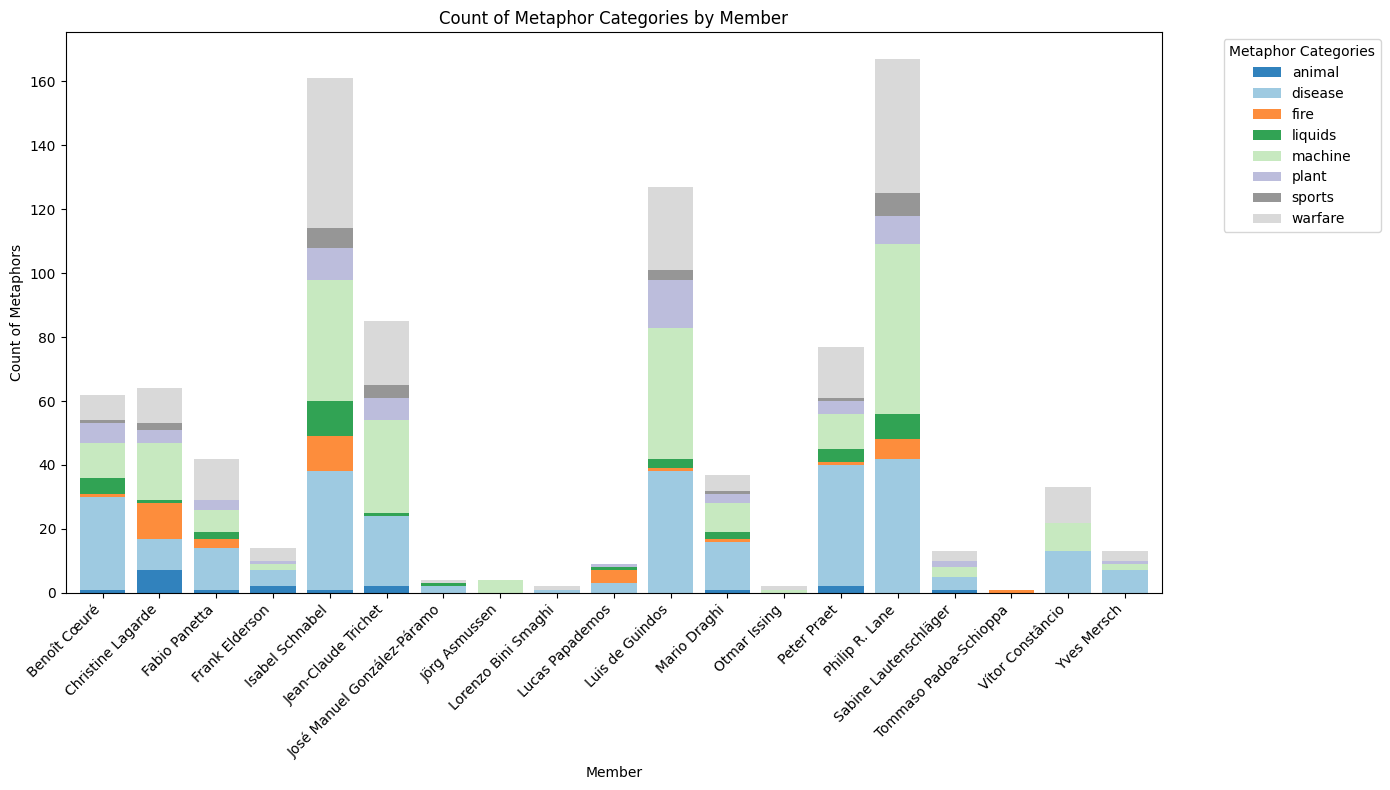

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Explode the GPT_Majority_Category column
data_exploded = data.explode('GPT_Majority_Category')

# Step 2: Group by Member and GPT_Majority_Category and count the occurrences
member_category_counts = data_exploded.groupby(['Member', 'GPT_Majority_Category']).size().reset_index(name='Count')

# Step 3: Pivot the data to get the metaphor categories as columns
pivot_data = member_category_counts.pivot(index='Member', columns='GPT_Majority_Category', values='Count').fillna(0)

# Step 4: Plot the stacked bar chart with a sober color palette
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20c', width=0.8)

# Labels and Titles
plt.xlabel('Member')
plt.ylabel('Count of Metaphors')
plt.title('Count of Metaphor Categories by Member')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metaphor Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

Same plot but using percentage to allow comparison (and only look at members with more than 40 metaphors) 

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_86875/410426665.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = (filtered_data[column] / filtered_data['Total']) * 100


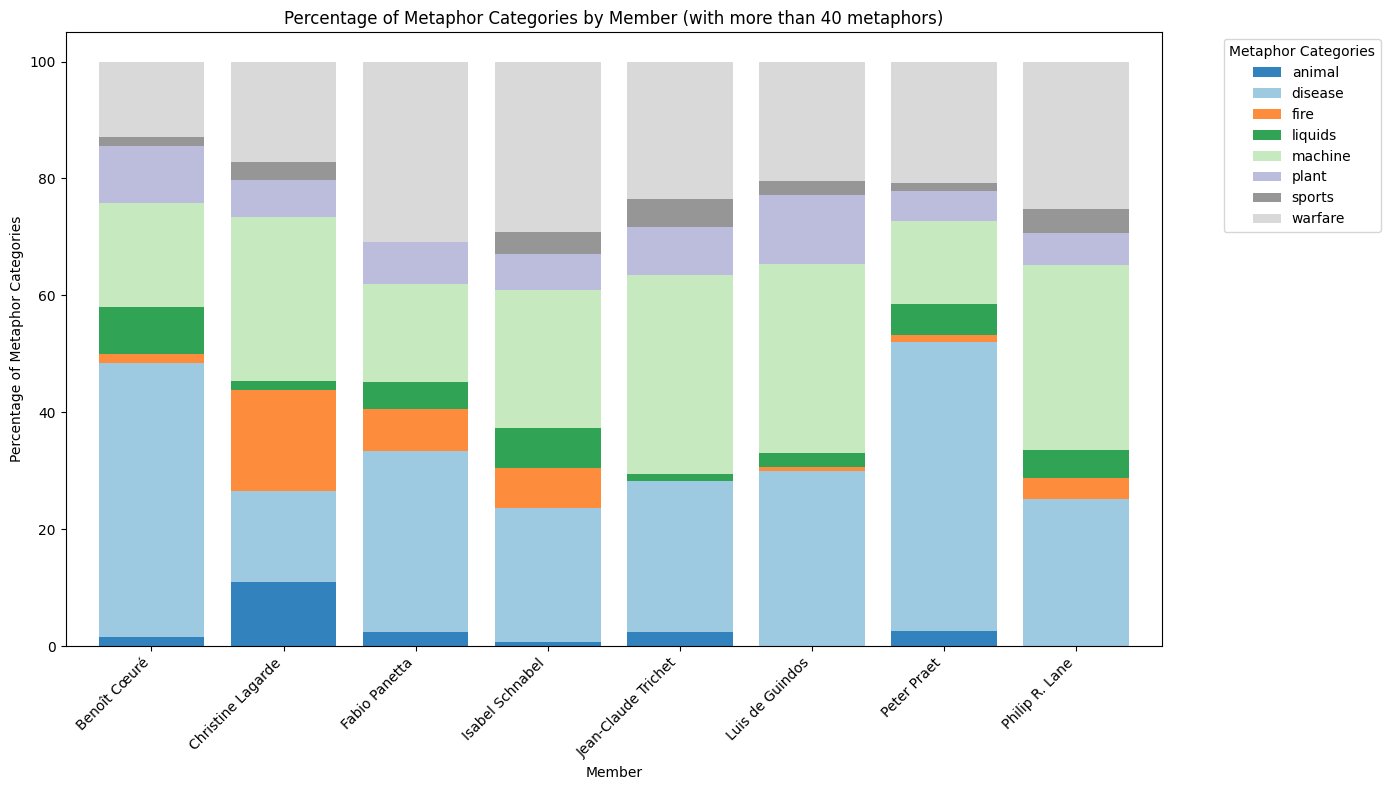

In [ ]:
# Step 1: Explode the GPT_Majority_Category column
data_exploded = data.explode('GPT_Majority_Category')

# Step 2: Group by Member and GPT_Majority_Category and count the occurrences
member_category_counts = data_exploded.groupby(['Member', 'GPT_Majority_Category']).size().reset_index(name='Count')

# Step 3: Pivot the data to get the metaphor categories as columns
pivot_data = member_category_counts.pivot(index='Member', columns='GPT_Majority_Category', values='Count').fillna(0)

# Step 4: Calculate the total number of metaphors for each member
pivot_data['Total'] = pivot_data.sum(axis=1)

# Step 5: Filter members with more than 40 metaphors
filtered_data = pivot_data[pivot_data['Total'] > 40]

# Step 6: Calculate the percentage for each category
for column in filtered_data.columns[:-1]:  # Exclude the 'Total' column
    filtered_data[column] = (filtered_data[column] / filtered_data['Total']) * 100

# Step 7: Drop the 'Total' column as it is no longer needed
filtered_data = filtered_data.drop(columns='Total')

# Step 8: Plot the stacked bar chart with a sober color palette
filtered_data.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20c', width=0.8)

# Labels and Titles
plt.xlabel('Member')
plt.ylabel('Percentage of Metaphor Categories')
plt.title('Percentage of Metaphor Categories by Member (with more than 40 metaphors)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metaphor Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### B. By Gender

In [ ]:
# Group by gender to see which gender uses which categories most frequently
gender_category_counts = data.explode('GPT_Majority_Category').groupby(['Gender', 'GPT_Majority_Category']).size().unstack(fill_value=0)

# Identify the most frequent category for each gender
most_frequent_category_gender = gender_category_counts.idxmax(axis=1)
most_frequent_count_gender = gender_category_counts.max(axis=1)

# Create a summary DataFrame
summary_gender_df = pd.DataFrame({
    'Gender': most_frequent_category_gender.index,
    'Most Frequent Category': most_frequent_category_gender.values,
    'Count': most_frequent_count_gender.values
})

# Display the summary table
print("\nMost Frequent Metaphor Category by Gender:")
summary_gender_df


Most Frequent Metaphor Category by Gender:


Gender Most Frequent Category  Count
0      F                warfare     61
1      M                disease    228

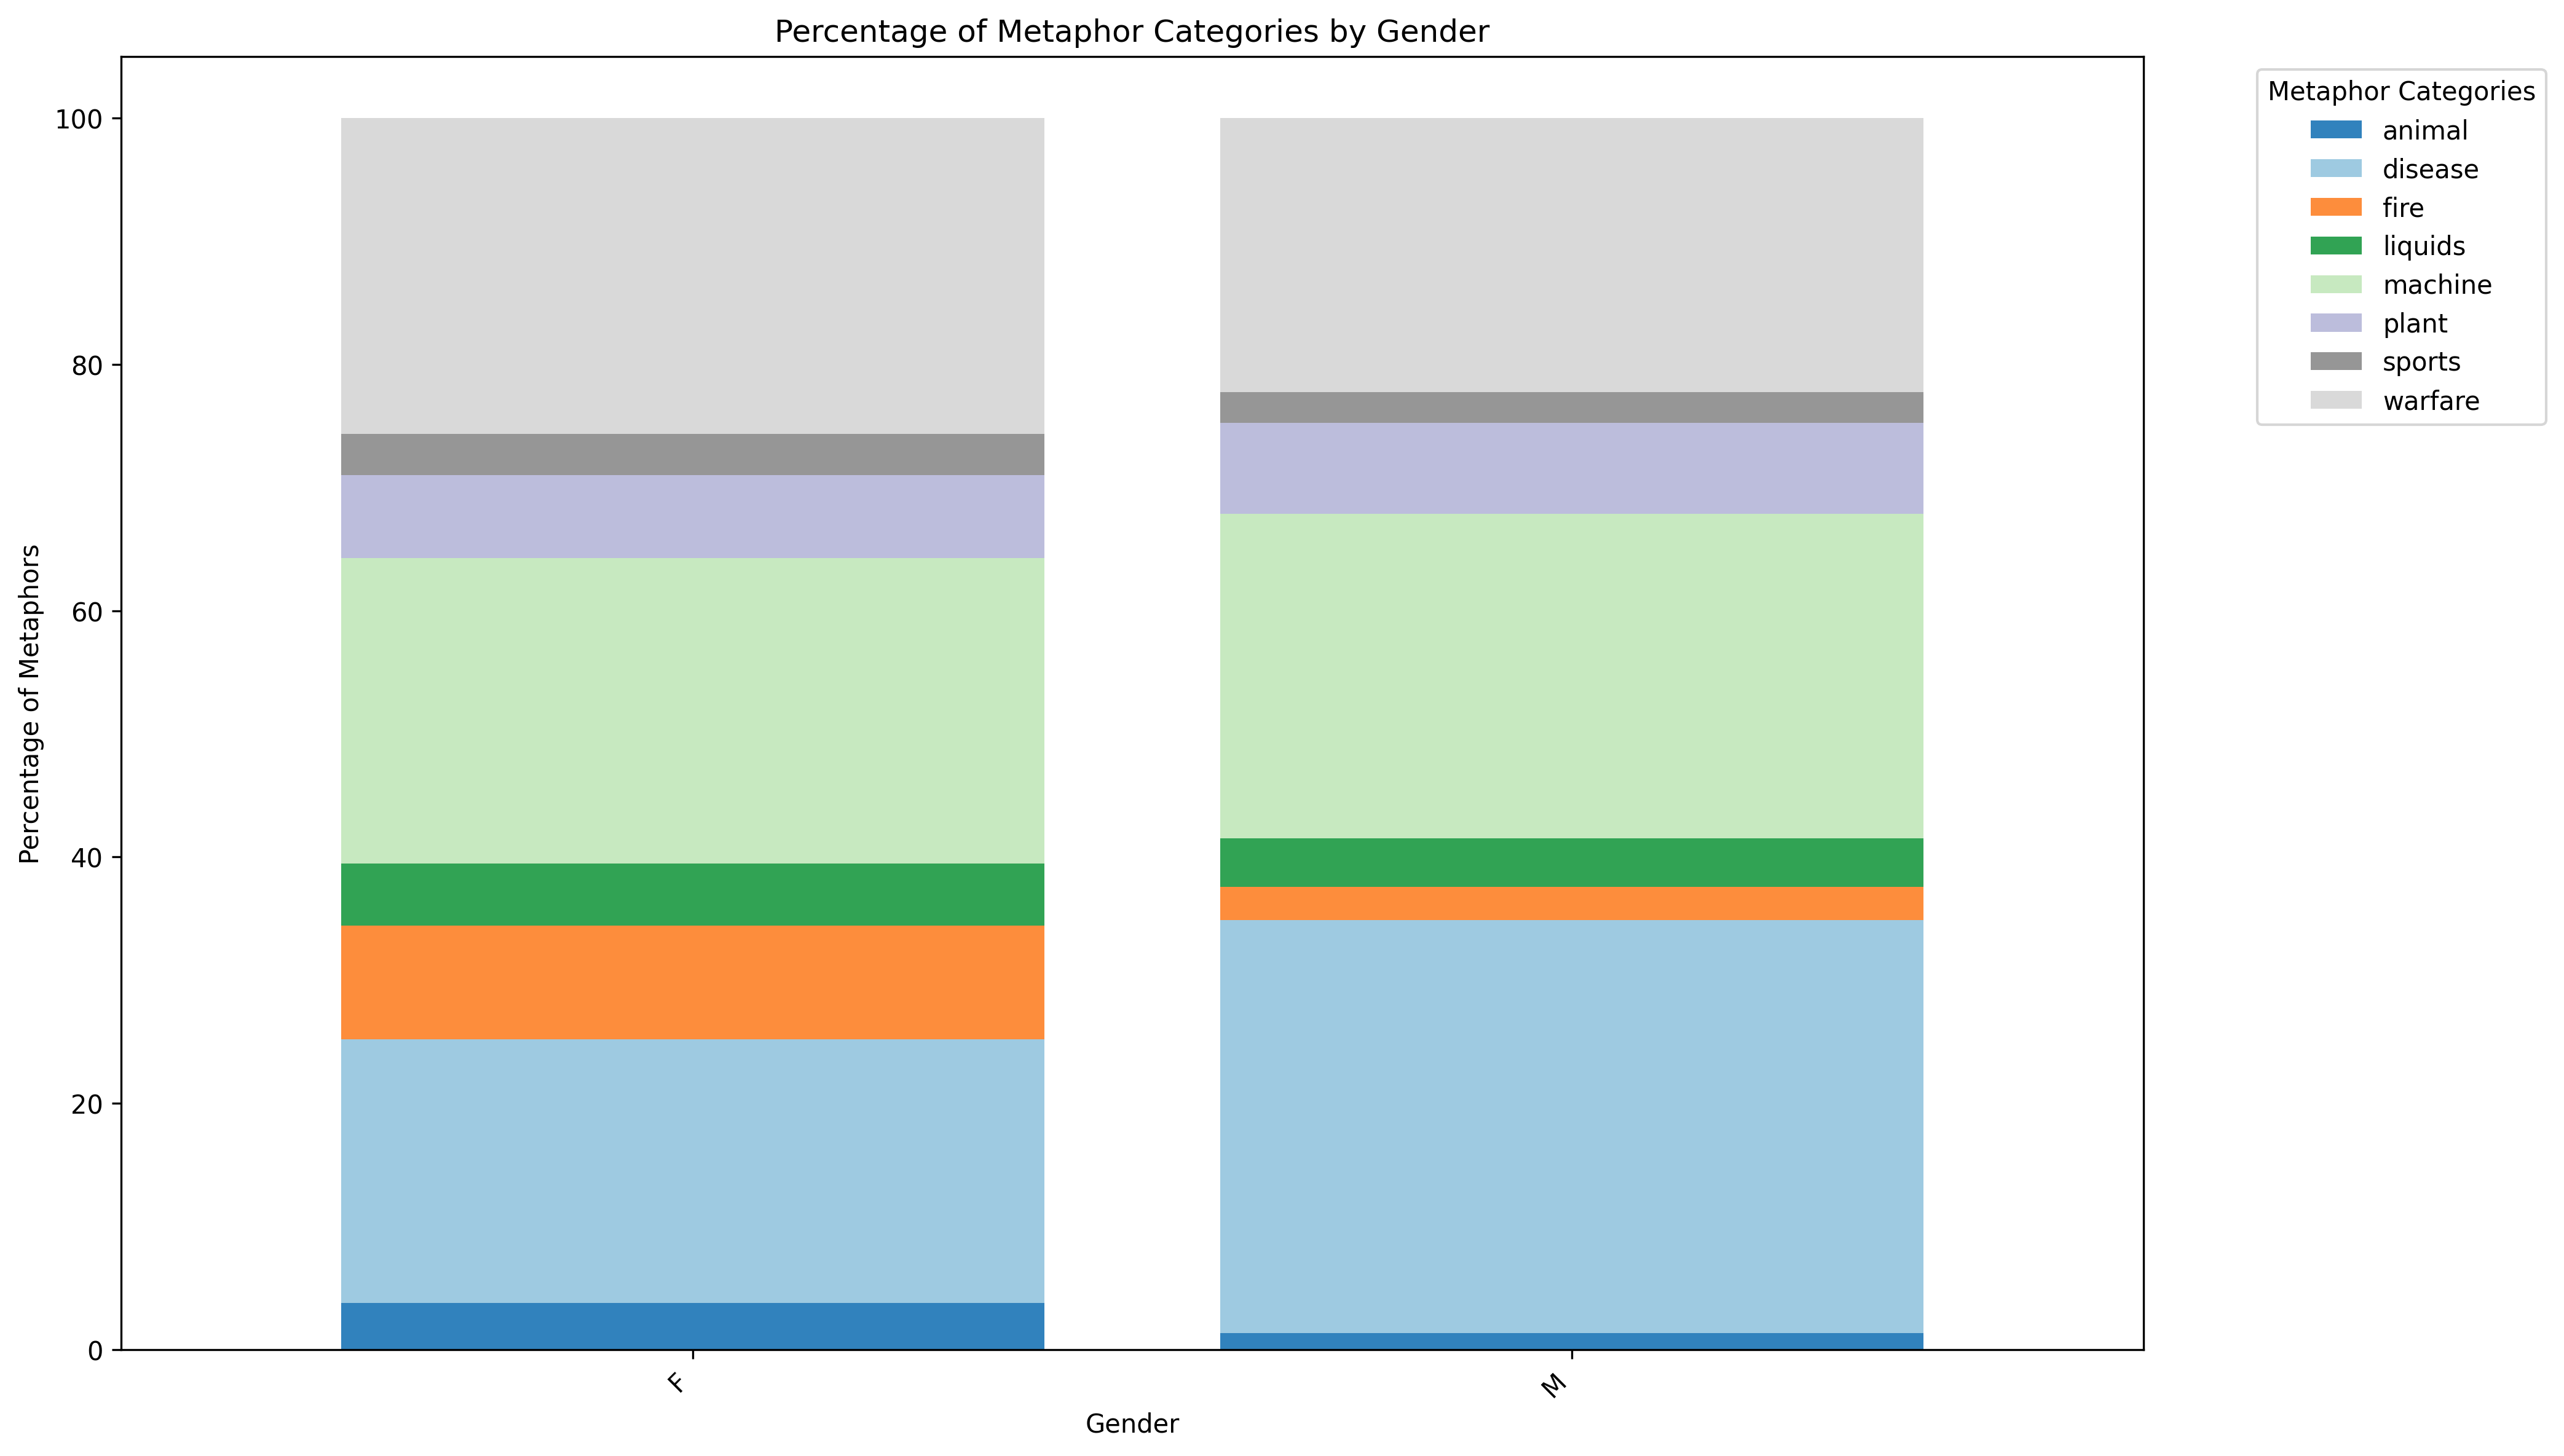

In [ ]:
# Step 1: Explode the GPT_Majority_Category column
data_exploded = data.explode('GPT_Majority_Category')

# Step 2: Group by Gender and GPT_Majority_Category and count the occurrences
gender_category_counts = data_exploded.groupby(['Gender', 'GPT_Majority_Category']).size().reset_index(name='Count')

# Step 3: Pivot the data to get the metaphor categories as columns
pivot_data = gender_category_counts.pivot(index='Gender', columns='GPT_Majority_Category', values='Count').fillna(0)

# Step 4: Normalize the counts to get percentages
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Step 5: Plot the stacked bar chart with a sober color palette
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
pivot_data_percentage.plot(kind='bar', stacked=True, ax=ax, cmap='tab20c', width=0.8)

# Labels and Titles
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of Metaphors')
ax.set_title('Percentage of Metaphor Categories by Gender')
ax.set_xticks(range(len(pivot_data.index)))
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')

# Set legend title and position
ax.legend(title='Metaphor Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### C. By Year of Birth

In [ ]:
# Group by year of birth to see trends over time
year_category_counts = data.explode('GPT_Majority_Category').groupby(['YoB', 'GPT_Majority_Category']).size().unstack(fill_value=0)

print("\nCategory Usage by Year of Birth:")
year_category_counts



Category Usage by Year of Birth:


GPT_Majority_Category  animal  disease  fire  liquids  machine  plant  sports  \
YoB                                                                             
1936                        0        0     0        0        1      0       0   
1940                        0        0     1        0        0      0       0   
1942                        2       22     0        1       29      7       4   
1943                        0       13     0        0        9      0       0   
1947                        1       18     5        3        9      4       1   
1949                        2       45     1        4       13      5       1   
1956                        7       11    11        1       18      4       2   
1958                        0        2     0        1        0      0       0   
1959                        1       13     3        2        7      3       0   
1960                        0       38     1        3       41     15       3   
1964                        1        4     0        0        3      2       0   
1966                        0        0     0        0        4      0       0   
1969                        1       71     7       13       64     15       8   
1970                        2        5     0        0        2      1       0   
1971                        1       37    11       11       38     10       6   

GPT_Majority_Category  warfare  
YoB                             
1936                         1  
1940                         0  
1942                        20  
1943                        11  
1947                         5  
1949                        19  
1956                        12  
1958                         1  
1959                        13  
1960                        26  
1964                         3  
1966                         0  
1969                        50  
1970                         4  
1971                        47

In [ ]:
# Group by year of birth to see which year uses which categories most frequently
year_category_counts = data.explode('GPT_Majority_Category').groupby(['YoB', 'GPT_Majority_Category']).size().unstack(fill_value=0)

# Identify the most frequent category for each year of birth
most_frequent_category_year = year_category_counts.idxmax(axis=1)
most_frequent_count_year = year_category_counts.max(axis=1)

# Create a summary DataFrame
summary_year_df = pd.DataFrame({
    'Year_of_Birth': most_frequent_category_year.index,
    'Most Frequent Category': most_frequent_category_year.values,
    'Count': most_frequent_count_year.values
})

# Display the summary table
print("\nMost Frequent Metaphor Category by Year of Birth:")
summary_year_df


Most Frequent Metaphor Category by Year of Birth:


Year_of_Birth Most Frequent Category  Count
0            1936                machine      1
1            1940                   fire      1
2            1942                machine     29
3            1943                disease     13
4            1947                disease     18
5            1949                disease     45
6            1956                machine     18
7            1958                disease      2
8            1959                disease     13
9            1960                machine     41
10           1964                disease      4
11           1966                machine      4
12           1969                disease     71
13           1970                disease      5
14           1971                warfare     47

### D. Relationship between the category of metaphor used and the media

In [ ]:
# Step 1: Compute the total number of interviews for each media
total_interviews_by_media = data['Media'].value_counts().reset_index()
total_interviews_by_media.columns = ['Media', 'Total_ITW']

# Step 2: Select the top 10 media with the most interviews
top_10_media = total_interviews_by_media.head(10)['Media']

# Step 3: Explode the GPT_Majority_Category column
data_exploded = data.explode('GPT_Majority_Category')

# Step 4: Group by Media and GPT_Majority_Category and count the occurrences
media_metaphor_counts = data_exploded.groupby(['Media', 'GPT_Majority_Category']).size().reset_index(name='Count')

# Step 5: Filter the data to only include the top 10 media
top_10_media_metaphor_counts = media_metaphor_counts[media_metaphor_counts['Media'].isin(top_10_media)]

# Step 6: Pivot the data to get the metaphor categories as columns
pivot_data = top_10_media_metaphor_counts.pivot(index='Media', columns='GPT_Majority_Category', values='Count').fillna(0)
pivot_data

GPT_Majority_Category               animal  disease  fire  liquids  machine  \
Media                                                                         
Interview with Bloomberg               0.0     11.0   0.0      3.0     10.0   
Interview with Börsen-Zeitung          0.0     14.0   1.0      2.0      2.0   
Interview with Die Zeit                0.0      9.0   1.0      0.0      1.0   
Interview with Financial Times         1.0     13.0   2.0      1.0     15.0   
Interview with Handelsblatt            1.0      9.0   0.0      3.0      3.0   
Interview with Il Sole 24 Ore          0.0      7.0   0.0      1.0      6.0   
Interview with Le Monde                0.0      4.0   0.0      1.0      4.0   
Interview with Les Echos               0.0      6.0   0.0      1.0      4.0   
Interview with Süddeutsche Zeitung     0.0     13.0   0.0      1.0      3.0   
Q&A on Twitter                         1.0     14.0   0.0      0.0      5.0   

GPT_Majority_Category               plant  sports  warfare  
Media                                                       
Interview with Bloomberg              3.0     0.0      8.0  
Interview with Börsen-Zeitung         2.0     0.0      4.0  
Interview with Die Zeit               4.0     0.0      4.0  
Interview with Financial Times        5.0     2.0     11.0  
Interview with Handelsblatt           2.0     1.0      5.0  
Interview with Il Sole 24 Ore         0.0     0.0      7.0  
Interview with Le Monde               1.0     0.0      3.0  
Interview with Les Echos              1.0     0.0      2.0  
Interview with Süddeutsche Zeitung    0.0     2.0      9.0  
Q&A on Twitter                        1.0     0.0     12.0

In [ ]:
# Step 7: Identify the most used metaphor category for each media
most_used_metaphor_by_media = pivot_data.idxmax(axis=1)
most_used_counts = pivot_data.max(axis=1).reset_index(name='Count')
most_used_metaphor_by_media = pd.DataFrame({'Media': most_used_metaphor_by_media.index, 'Most_Used_Category': most_used_metaphor_by_media.values, 'Count': most_used_counts['Count']})
most_used_metaphor_by_media

Media Most_Used_Category  Count
0            Interview with Bloomberg            disease   11.0
1       Interview with Börsen-Zeitung            disease   14.0
2             Interview with Die Zeit            disease    9.0
3      Interview with Financial Times            machine   15.0
4         Interview with Handelsblatt            disease    9.0
5       Interview with Il Sole 24 Ore            disease    7.0
6             Interview with Le Monde            disease    4.0
7            Interview with Les Echos            disease    6.0
8  Interview with Süddeutsche Zeitung            disease   13.0
9                      Q&A on Twitter            disease   14.0

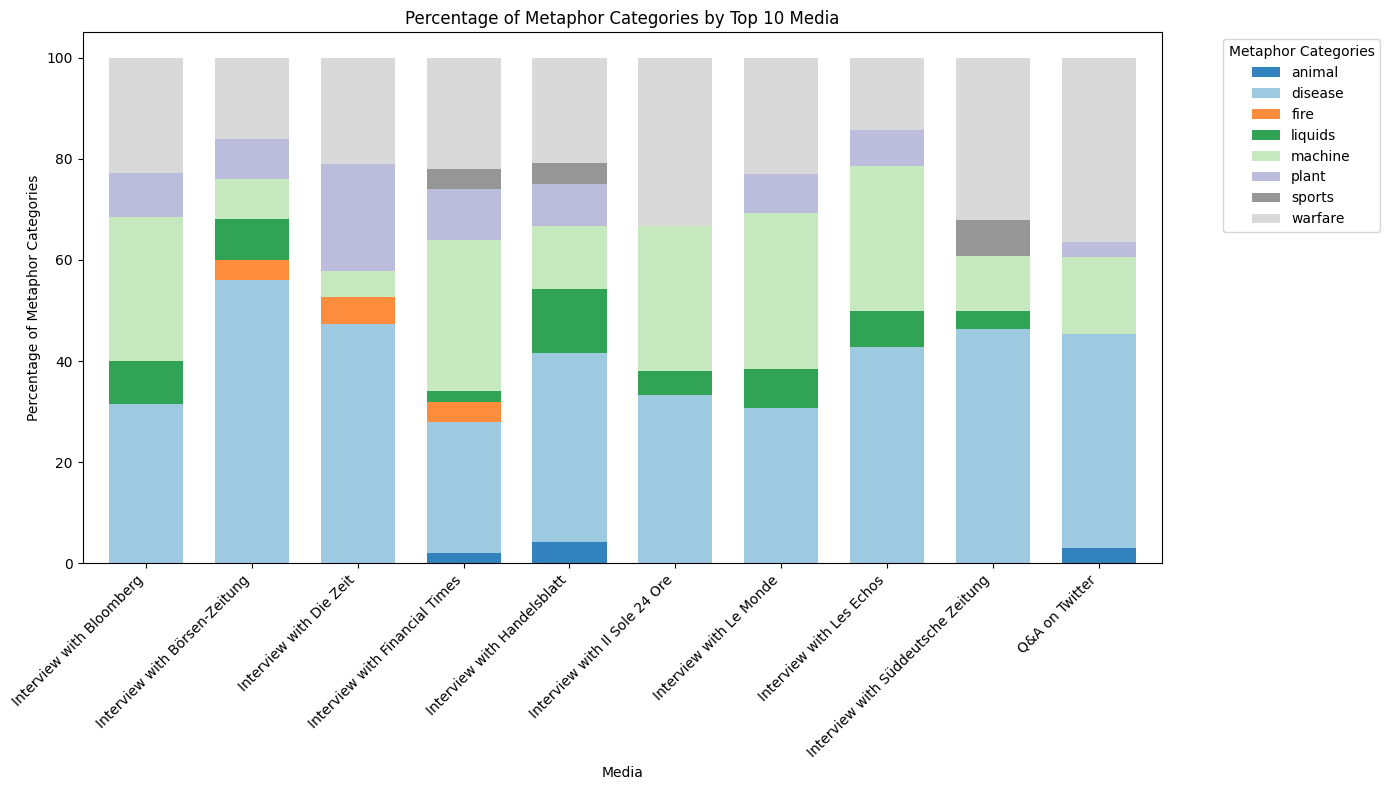

In [ ]:
# Step 1: Compute the total number of interviews for each media
total_interviews_by_media = data['Media'].value_counts().reset_index()
total_interviews_by_media.columns = ['Media', 'Total_ITW']

# Step 2: Select the top 10 media with the most interviews
top_10_media = total_interviews_by_media.head(10)['Media']

# Step 3: Explode the GPT_Majority_Category column
data_exploded = data.explode('GPT_Majority_Category')

# Step 4: Group by Media and GPT_Majority_Category and count the occurrences
media_metaphor_counts = data_exploded.groupby(['Media', 'GPT_Majority_Category']).size().reset_index(name='Count')

# Step 5: Filter the data to only include the top 10 media
top_10_media_metaphor_counts = media_metaphor_counts[media_metaphor_counts['Media'].isin(top_10_media)]

# Step 6: Calculate the percentage of each metaphor category for each media
top_10_media_total_counts = top_10_media_metaphor_counts.groupby('Media')['Count'].sum().reset_index()
top_10_media_metaphor_counts = pd.merge(top_10_media_metaphor_counts, top_10_media_total_counts, on='Media', suffixes=('', '_Total'))
top_10_media_metaphor_counts['Percentage'] = (top_10_media_metaphor_counts['Count'] / top_10_media_metaphor_counts['Count_Total']) * 100

# Step 7: Pivot the data to get the metaphor categories as columns
pivot_data = top_10_media_metaphor_counts.pivot(index='Media', columns='GPT_Majority_Category', values='Percentage').fillna(0)

# Step 8: Plot the stacked bar chart with darker colors
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20c', width=0.7)

# Labels and Titles
plt.xlabel('Media')
plt.ylabel('Percentage of Metaphor Categories')
plt.title('Percentage of Metaphor Categories by Top 10 Media')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metaphor Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


By Media Category (General or Economics/Finance)

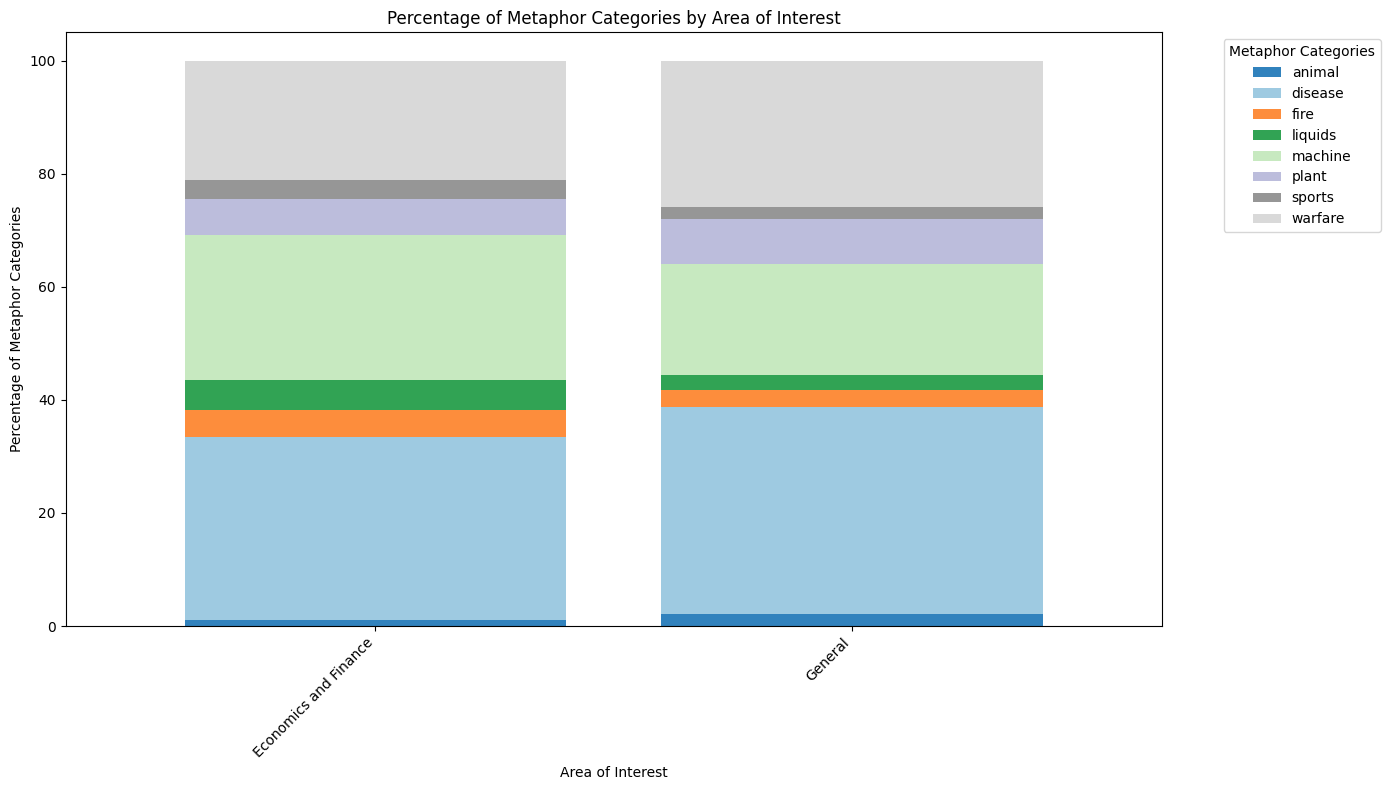

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Add a new column for area of interest
data['Area_of_Interest'] = data['Media'].apply(lambda x: media_interest_mapping.get(x, 'Other'))

# Step 2: Compute the total number of interviews for each area of interest
total_interviews_by_area = data['Area_of_Interest'].value_counts().reset_index()
total_interviews_by_area.columns = ['Area_of_Interest', 'Total_ITW']

# Step 3: Explode the GPT_Majority_Category column
data_exploded = data.explode('GPT_Majority_Category')

# Step 4: Group by Area_of_Interest and GPT_Majority_Category and count the occurrences
area_metaphor_counts = data_exploded.groupby(['Area_of_Interest', 'GPT_Majority_Category']).size().reset_index(name='Count')

# Step 5: Calculate the percentage of each metaphor category for each area of interest
area_total_counts = area_metaphor_counts.groupby('Area_of_Interest')['Count'].sum().reset_index()
area_metaphor_counts = pd.merge(area_metaphor_counts, area_total_counts, on='Area_of_Interest', suffixes=('', '_Total'))
area_metaphor_counts['Percentage'] = (area_metaphor_counts['Count'] / area_metaphor_counts['Count_Total']) * 100

# Step 6: Filter out the 'Other' category
area_metaphor_counts = area_metaphor_counts[area_metaphor_counts['Area_of_Interest'] != 'Other']

# Step 7: Pivot the data to get the metaphor categories as columns
pivot_data = area_metaphor_counts.pivot(index='Area_of_Interest', columns='GPT_Majority_Category', values='Percentage').fillna(0)

# Step 8: Plot the stacked bar chart with a sober color palette
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20c', width=0.8)

# Labels and Titles
plt.xlabel('Area of Interest')
plt.ylabel('Percentage of Metaphor Categories')
plt.title('Percentage of Metaphor Categories by Area of Interest')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metaphor Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### 3. Is there a relationship between the speeches sentiment score and the number of metaphors used? 
-------
[Back to Index](#authors)


### Speech Sentiment Analysis

In [ ]:
"""
1. Using TextBlob Library 
"""

# Perform sentiment analysis using TextBlob
data['Sentiment_Score_Text_Blob'] = data['Answers'].apply(lambda speech: TextBlob(speech).sentiment.polarity)
data['Sentiment_Score_Text_Blob'].head(10)

0    0.137979
1    0.173579
2    0.084569
3    0.152205
4    0.094762
5    0.096294
6    0.077531
7    0.158274
8    0.069662
9    0.122377
Name: Sentiment_Score_Text_Blob, dtype: float64

In [ ]:
"""
2. Using Vader Library 
"""

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis using VADER
data['Sentiment_Score_Vader'] = data['Answers'].apply(lambda speech: analyzer.polarity_scores(speech)['compound'])
data['Sentiment_Score_Vader'].head(10)


0    0.9998
1    0.9991
2    0.9998
3    0.9998
4    0.9983
5    0.9993
6    0.9958
7    0.9999
8    0.9805
9    0.9997
Name: Sentiment_Score_Vader, dtype: float64

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
"""
3. Using Transformer Pipeline
"""
from transformers import pipeline, DistilBertTokenizerFast

# Initialize the sentiment analysis pipeline with PyTorch
sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")

# Initialize the tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Define the maximum length
MAX_SEQ_LEN = 512

# Function to split text into chunks of a specified maximum token length
def chunk_text(text, max_len=MAX_SEQ_LEN):
    tokens = tokenizer(text, truncation=True, padding='max_length', max_length=max_len, return_tensors='pt')
    return [tokenizer.decode(t, skip_special_tokens=True) for t in tokens['input_ids']]

# Function to get sentiment score for a chunk
def get_chunk_sentiment(chunk):
    result = sentiment_pipeline(chunk)[0]
    return result['score']

# Function to perform sentiment analysis on long texts
def get_transformer_sentiment(text):
    chunks = chunk_text(text)
    scores = [get_chunk_sentiment(chunk) for chunk in chunks]
    return sum(scores) / len(scores)  # Average score of all chunks

# Apply the sentiment analysis and store the results in new columns
data['Sentiment_Score_Transformer'] = data['Answers'].apply(
    lambda speech: get_transformer_sentiment(speech)
)

# Display the first few sentiment scores
print(data['Sentiment_Score_Transformer'].head(5))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


0    0.992319
1    0.971619
2    0.995173
3    0.962427
4    0.990240
Name: Sentiment_Score_Transformer, dtype: float64


In [ ]:
data.head(2)

Unnamed: 0        Date                              Media  \
0           0  2005-12-23         Interview with Der Spiegel   
1           1  2005-12-19  Interview with Hospodářské Noviny   

                Member                                               Link  \
0  Jean-Claude Trichet  https://www.ecb.europa.eu/press/inter/date/200...   
1         Otmar Issing  https://www.ecb.europa.eu/press/inter/date/200...   

             Information                                          Questions  \
0  Information not found  SPIEGEL: Monsieur Trichet, any concrete uttera...   
1  Information not found  The new EU member states want to adopt the eur...   

                                             Answers Metaphors  \
0  The publication of the translation was authori...       NaN   
1  These questions are all closely related to eac...       NaN   

  Metaphors Sentence  ...  pos_relationships_len  \
0                NaN  ...                      3   
1                NaN  ...                      0   

             Category_GPT_Majority Count_Metaphors Speech_Total_Words  \
0  ['machine', 'disease', 'plant']               3               1520   
1                      ['warfare']               1                528   

  Member_Metaphors_Per_Word Total_ITW       Area_of_Interest  \
0                   0.00139        76                General   
1                   0.00404         2  Economics and Finance   

   Sentiment_Score_Text_Blob  Sentiment_Score_Vader  \
0                   0.137979                 0.9998   
1                   0.173579                 0.9991   

  Sentiment_Score_Transformer  
0                    0.992319  
1                    0.971619  

[2 rows x 39 columns]

### A. Relationship between Sentiment Score and Count of Metaphors

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_86875/1430573319.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_metaphors = data.set_index('Date').resample('M')['Count_Metaphors'].sum().reset_index()
/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_86875/1430573319.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment_textblob = data.set_index('Date').resample('M')['Sentiment_Score_Text_Blob'].mean().reset_index()
/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_86875/1430573319.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment_vader = data.set_index('Date').resample('M')['Sentiment_Score_Vader'].mean().reset_index()
/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_86875/1430573319.py:13: FutureWarning: 'M' is deprecated and will be 

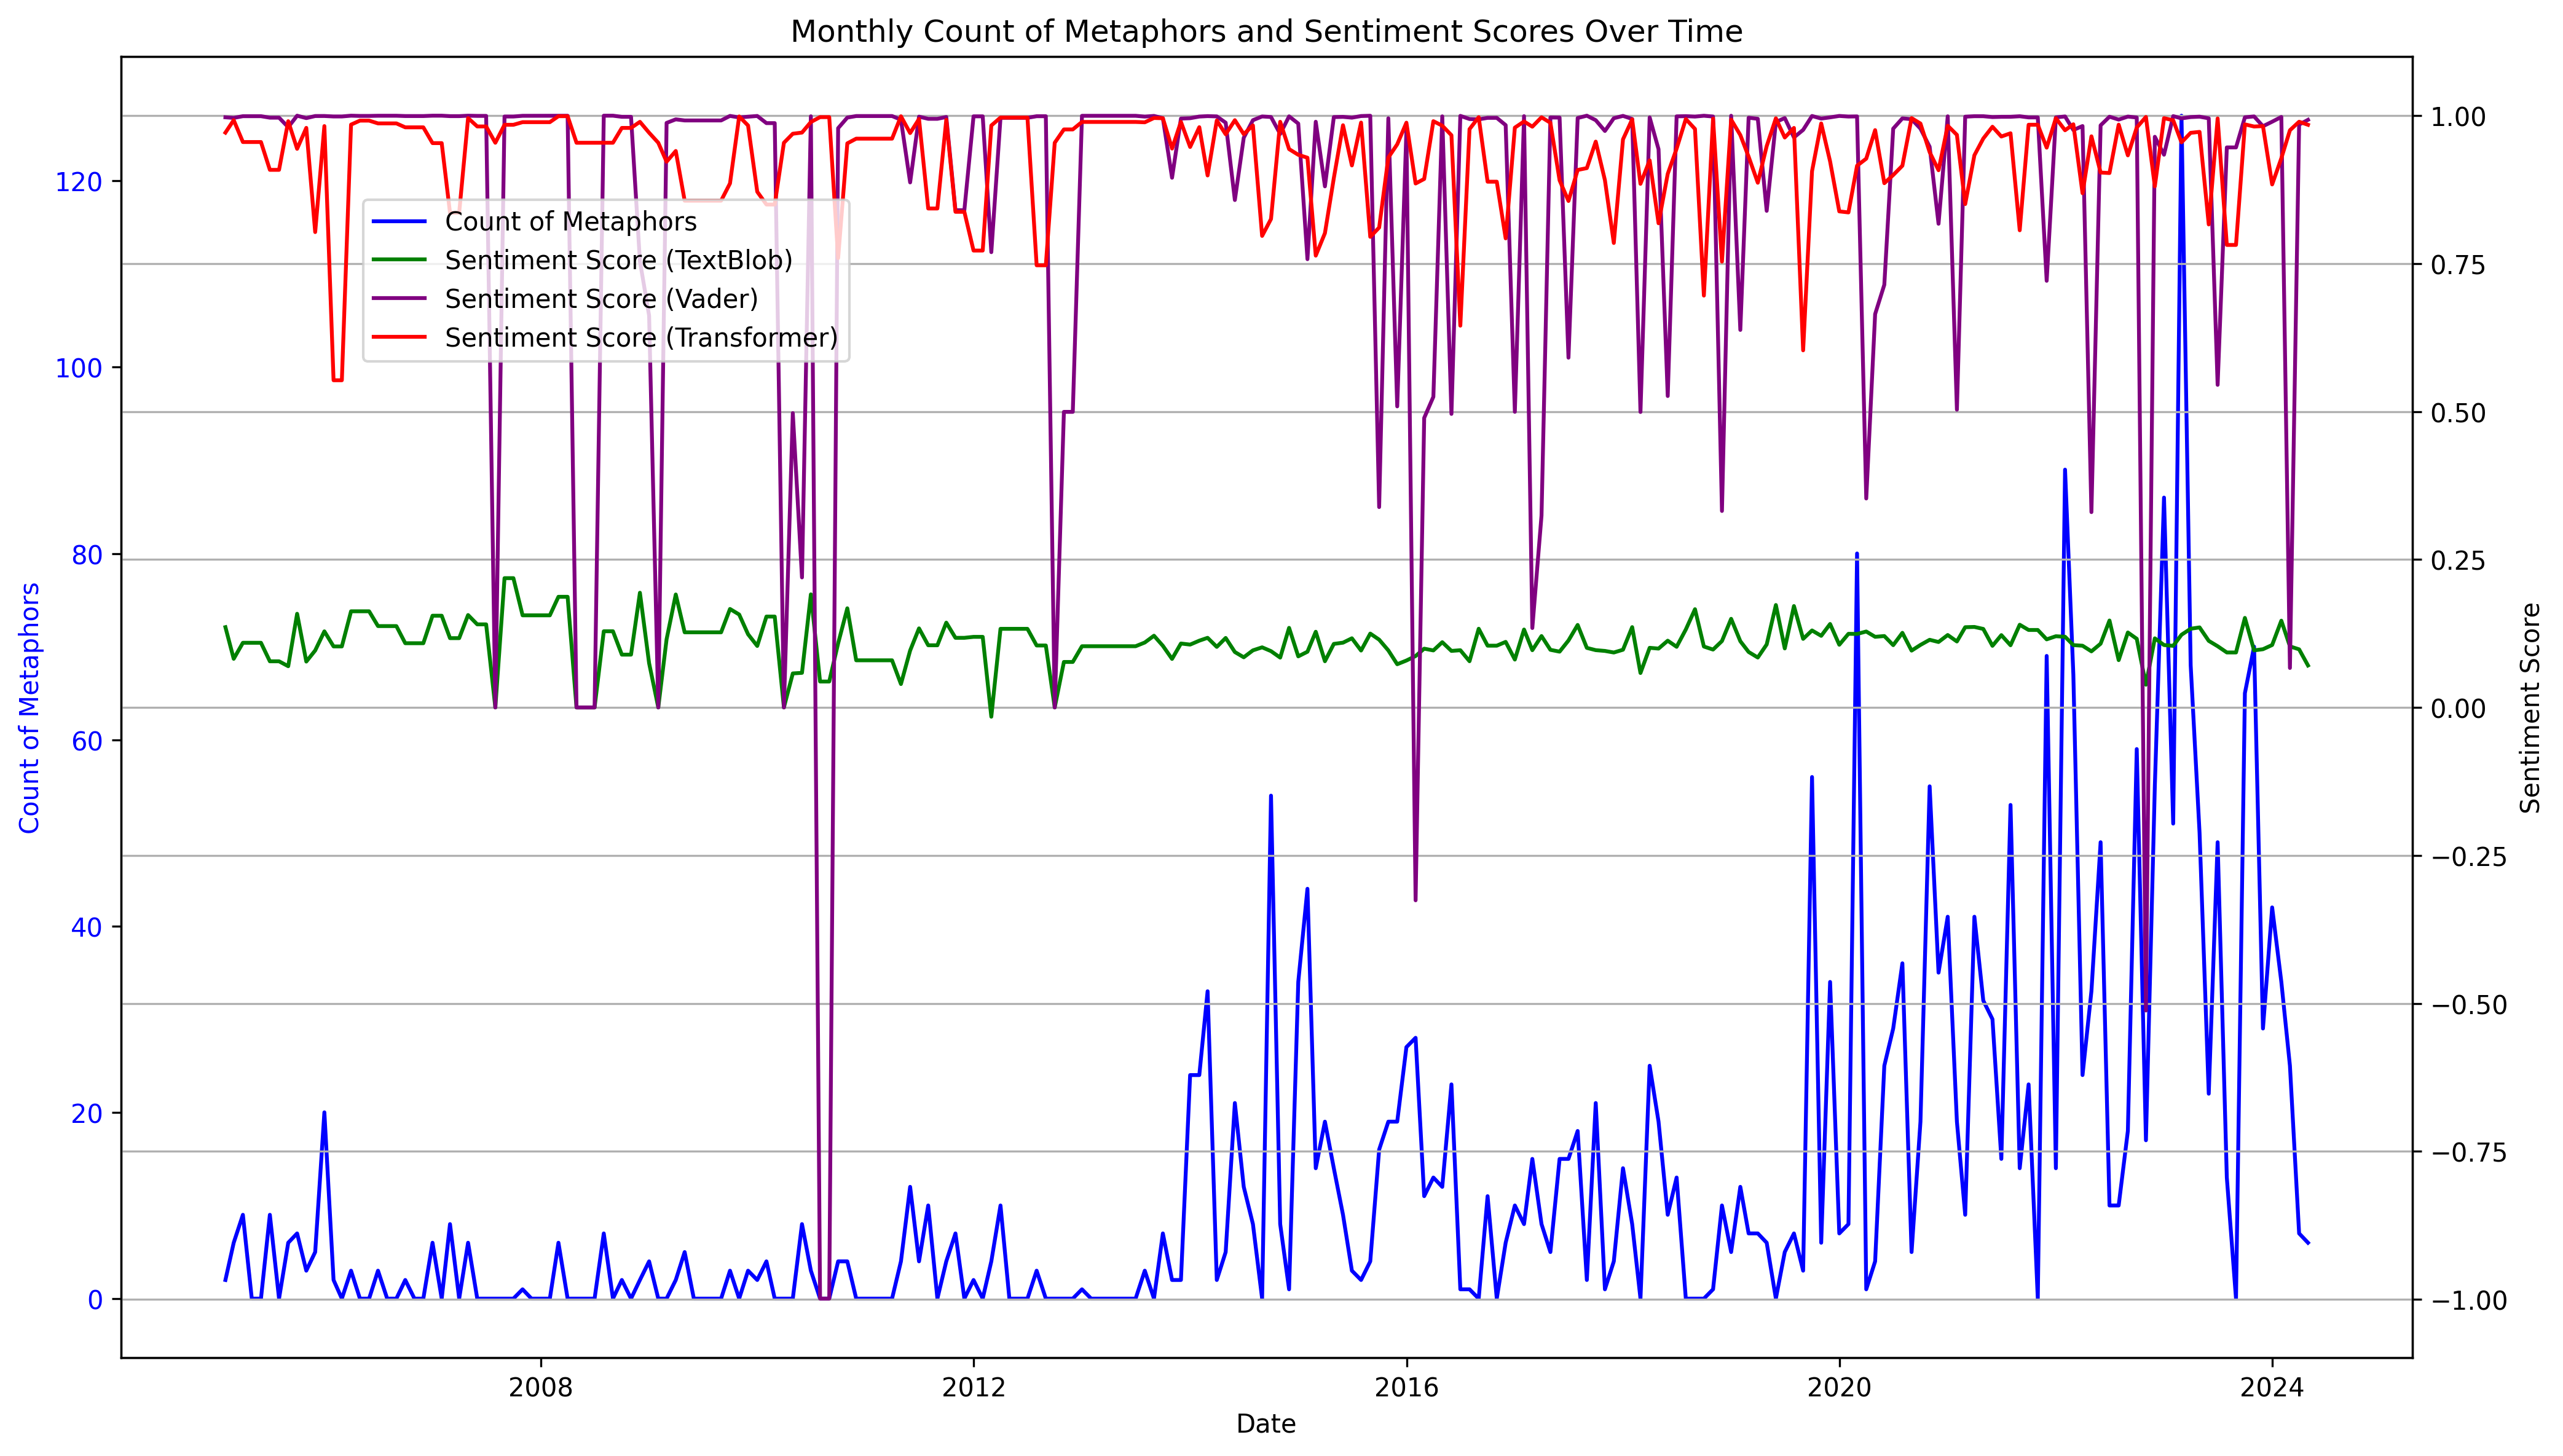

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Group by month and count the number of metaphors
monthly_metaphors = data.set_index('Date').resample('M')['Count_Metaphors'].sum().reset_index()

# Group by month and calculate the average sentiment scores
monthly_sentiment_textblob = data.set_index('Date').resample('M')['Sentiment_Score_Text_Blob'].mean().reset_index()
monthly_sentiment_vader = data.set_index('Date').resample('M')['Sentiment_Score_Vader'].mean().reset_index()
monthly_sentiment_transformer = data.set_index('Date').resample('M')['Sentiment_Score_Transformer'].mean().reset_index()

# Forward fill missing values to ensure continuous lines
monthly_sentiment_textblob = monthly_sentiment_textblob.fillna(method='ffill')
monthly_sentiment_vader = monthly_sentiment_vader.fillna(method='ffill')
monthly_sentiment_transformer = monthly_sentiment_transformer.fillna(method='ffill')

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=300)

# Plot the count of metaphors
ax1.plot(monthly_metaphors['Date'], monthly_metaphors['Count_Metaphors'], label='Count of Metaphors', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count of Metaphors', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the sentiment scores
ax2 = ax1.twinx()
ax2.plot(monthly_sentiment_textblob['Date'], monthly_sentiment_textblob['Sentiment_Score_Text_Blob'], label='Sentiment Score (TextBlob)', color='green')
ax2.plot(monthly_sentiment_vader['Date'], monthly_sentiment_vader['Sentiment_Score_Vader'], label='Sentiment Score (Vader)', color='purple')
ax2.plot(monthly_sentiment_transformer['Date'], monthly_sentiment_transformer['Sentiment_Score_Transformer'], label='Sentiment Score (Transformer)', color='red')
ax2.set_ylabel('Sentiment Score', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)

# Add title and grid
plt.title('Monthly Count of Metaphors and Sentiment Scores Over Time')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure no missing values
data_clean = data[['Count_Metaphors', 'Sentiment_Score_Text_Blob', 'Sentiment_Score_Vader', 'Sentiment_Score_Transformer']].dropna()

# Define a function to perform Poisson regression and print results
def perform_poisson_regression(y_variable):
    formula = f'Count_Metaphors ~ {y_variable}'
    model = smf.poisson(formula=formula, data=data_clean).fit()
    print(f"\nPoisson Regression results for {y_variable}:")
    print(model.summary())

# Perform Poisson regression for each sentiment score
perform_poisson_regression('Sentiment_Score_Text_Blob')
perform_poisson_regression('Sentiment_Score_Vader')
perform_poisson_regression('Sentiment_Score_Transformer')


Optimization terminated successfully.
         Current function value: 5.037713
         Iterations 4

Poisson Regression results for Sentiment_Score_Text_Blob:
                          Poisson Regression Results                          
Dep. Variable:        Count_Metaphors   No. Observations:                  519
Model:                        Poisson   Df Residuals:                      517
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Jun 2024   Pseudo R-squ.:               0.0003938
Time:                        17:23:57   Log-Likelihood:                -2614.6
converged:                       True   LL-Null:                       -2615.6
Covariance Type:            nonrobust   LLR p-value:                    0.1512
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept          

### 4. Is there a relationship between some metaphor's categories and movement of inflation? 
-------

In [ ]:
data

Unnamed: 0       Date                                              Media  \
0             0 2005-12-23                         Interview with Der Spiegel   
1             1 2005-12-19                  Interview with Hospodářské Noviny   
2             2 2005-12-19  Interview with Financial Times and Financial T...   
3             3 2005-12-15                         Interview with Paris Match   
4             4 2005-12-09                           Interview in Il Giornale   
..          ...        ...                                                ...   
514         514 2024-01-31                            Interview with Die Zeit   
515         515 2024-01-22                        Thanks to Wolfgang Schäuble   
516         516 2024-01-13                 Interview with Corriere della Sera   
517         517 2024-01-10                                           Q&A on X   
518         518 2024-01-03  Tribute article on Wolfgang Schäuble for Die Zeit   

                  Member                                               Link  \
0    Jean-Claude Trichet  https://www.ecb.europa.eu/press/inter/date/200...   
1           Otmar Issing  https://www.ecb.europa.eu/press/inter/date/200...   
2        Lucas Papademos  https://www.ecb.europa.eu/press/inter/date/200...   
3    Jean-Claude Trichet  https://www.ecb.europa.eu/press/inter/date/200...   
4    Lorenzo Bini Smaghi  https://www.ecb.europa.eu/press/inter/date/200...   
..                   ...                                                ...   
514      Luis de Guindos  https://www.ecb.europa.eu/press/inter/date/202...   
515    Christine Lagarde  https://www.ecb.europa.eu/press/inter/date/202...   
516       Philip R. Lane  https://www.ecb.europa.eu/press/inter/date/202...   
517      Isabel Schnabel  https://www.ecb.europa.eu/press/inter/date/202...   
518    Christine Lagarde  https://www.ecb.europa.eu/press/inter/date/202...   

                                           Information  \
0                                Information not found   
1                                Information not found   
2                                Information not found   
3                                Information not found   
4                                Information not found   
..                                                 ...   
514  Interview with Luis de Guindos, Vice-President...   
515  Contribution by Christine Lagarde, President o...   
516  Interview with Philip R. Lane, Member of the E...   
517  Interview with Isabel Schnabel, Member of the ...   
518  Tribute article on Wolfgang Schäuble for Die Z...   

                                             Questions  \
0    SPIEGEL: Monsieur Trichet, any concrete uttera...   
1    The new EU member states want to adopt the eur...   
2    Mr Papademos, you have responsibility as ECB V...   
3    Paris Match. After two uneventful years at the...   
4    However, Europe’s politicians, with few except...   
..                                                 ...   
514  Mr de Guindos, Germany is in a recession, the ...   
515                                         Disclaimer   
516  The rate hike in September was meant to increa...   
517  Who decided that 2% inflation is good and what...   
518                                                NaN   

                                               Answers  \
0    The publication of the translation was authori...   
1    These questions are all closely related to eac...   
2    A comparison of the risks involved when short-...   
3    The publication of the translation was authori...   
4    By Angelo Allegri, our correspondent in Frankf...   
..                                                 ...   
514  31 January 2024[end_answer] There are three re...   
515  Frankfurt am Main, 22 January 2024[end_answer]...   
516  13 January 2024[end_answer] The first point to...   
517  10 January 2024[end_answer] Hi all, this is@Is...   
518  3 January 2024[end_answer] When I think of Wol